<a href="https://colab.research.google.com/github/japabon216/Trabajo_de_grado_SM_Para_Clasificacion_ADL_Algoritmos_SL/blob/main/Parte_7_Entrenamiento_con_5_y_7_actividades.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install -U scikit-multiflow

#Carga del Dataset sin 16 completo

In [ ]:
Datasetsin16 = pd.read_csv('/content/drive/MyDrive/TESIS_DATASET/Datasets definitivos_CSV/Caracteristicas/Dataset_Final_para_stream_sin_16.csv')

In [ ]:
Datasetsin16

,Activity,X_Acc_std,Y_Acc_std,Z_Acc_std,X_Gyro_std,Y_Gyro_std,Z_Gyro_std,X_Acc_mean,Y_Acc_mean,Z_Acc_mean,...,Z_Gyro_abslt,X_Acc_entropy,Y_Acc_entropy,Z_Acc_entropy,X_Gyro_entropy,Y_Gyro_entropy,Z_Gyro_entropy,Sensor_Type,Left_Right,Ubication
0,3,0.556724,0.239285,0.264039,0.000000,0.000000,0.000000,-0.128850,0.458371,0.140565,...,0.000000,8.869784,8.814765,8.825255,-0.000000,-0.000000,-0.000000,3,1,2
1,3,0.537785,0.214547,0.238416,0.000000,0.000000,0.000000,-0.079838,0.447208,0.325525,...,0.000000,8.739016,8.692726,8.655216,-0.000000,-0.000000,-0.000000,3,1,2
2,3,0.637531,0.214326,0.386845,0.000000,0.000000,0.000000,-0.263432,0.339554,0.221761,...,0.000000,8.917784,8.854765,8.877784,-0.000000,-0.000000,-0.000000,3,1,2
3,3,0.438566,0.235876,0.325491,0.000000,0.000000,0.000000,-0.156160,0.449531,0.362703,...,0.000000,8.838765,8.800726,8.878765,-0.000000,-0.000000,-0.000000,3,1,2
4,3,0.146831,0.931747,0.136279,0.000000,0.000000,0.000000,0.069386,-0.053622,0.055953,...,0.000000,8.687216,8.629506,8.692196,-0.000000,-0.000000,-0.000000,3,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50355,92,0.010366,0.004910,0.004387,0.007087,0.015720,0.008609,0.391500,-0.393525,-0.834971,...,0.006779,7.350722,6.991137,6.989265,4.667774,5.354898,4.776474,2,0,2
50356,92,0.007642,0.003709,0.003556,0.006685,0.012076,0.007662,0.393547,-0.392699,-0.834528,...,0.006353,7.122322,6.852866,6.811416,4.588092,5.159502,4.690699,2,0,2
50357,92,0.006443,0.003205,0.003226,0.006427,0.010841,0.006824,0.386389,-0.391607,-0.836455,...,0.005570,7.109361,6.709386,6.822272,4.544186,4.999300,4.535226,2,0,2
50358,92,0.008432,0.004333,0.003977,0.007940,0.015388,0.010053,0.391080,-0.391641,-0.834824,...,0.008189,7.208515,6.932490,6.969884,4.821762,5.335375,5.025974,2,0,2


 Vemos las 8 actividades con más peso en el datastes

In [ ]:
activity_counts = Datasetsin16['Activity'].value_counts()

# Vemos las 8 actividades con más peso en el datastes
top_activities = activity_counts.nlargest(8)

print(top_activities)

6     8707
61    3454
16    3027
9     2884
18    2816
17    2668
13    2204
14    2021
Name: Activity, dtype: int64


#Carga del dataset con las 5 actividades

In [ ]:
Datasetsin16_5 = pd.read_csv('/content/drive/MyDrive/TESIS_DATASET/Datasets definitivos_CSV/Caracteristicas/Dataset_sin16_5actividades.csv')

Elegimos las 5 actividades seleccionadas

In [ ]:
values_to_mantain = [6,9,16,17,18]

Datasetsin16  = Datasetsin16[Datasetsin16['Activity'].isin(values_to_mantain)]

In [ ]:
Datasetsin16

,Activity,X_Acc_std,Y_Acc_std,Z_Acc_std,X_Gyro_std,Y_Gyro_std,Z_Gyro_std,X_Acc_mean,Y_Acc_mean,Z_Acc_mean,...,Z_Gyro_abslt,X_Acc_entropy,Y_Acc_entropy,Z_Acc_entropy,X_Gyro_entropy,Y_Gyro_entropy,Z_Gyro_entropy,Sensor_Type,Left_Right,Ubication
0,6,0.134097,0.098147,0.182132,0.0,0.0,0.0,-0.161459,0.653613,-0.019763,...,0.0,8.777255,8.750765,8.822765,-0.0,-0.0,-0.0,3,1,2
1,6,0.194315,0.134020,0.226218,0.0,0.0,0.0,-0.011172,0.664840,0.105325,...,0.0,8.823745,8.798235,8.862765,-0.0,-0.0,-0.0,3,1,2
2,6,0.149398,0.105812,0.219306,0.0,0.0,0.0,0.095016,0.663640,0.160545,...,0.0,8.790765,8.722235,8.888275,-0.0,-0.0,-0.0,3,1,2
3,6,0.137813,0.107971,0.216451,0.0,0.0,0.0,-0.009743,0.659828,-0.033546,...,0.0,8.816275,8.775745,8.884275,-0.0,-0.0,-0.0,3,1,2
4,6,0.180120,0.925169,0.182138,0.0,0.0,0.0,0.107054,-0.623551,0.020444,...,0.0,8.830765,8.929784,8.865784,-0.0,-0.0,-0.0,3,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20097,18,0.020649,0.018521,0.021463,0.0,0.0,0.0,-0.216313,-1.031614,0.542234,...,0.0,5.117584,5.116905,5.461060,-0.0,-0.0,-0.0,3,1,1
20098,18,0.028628,0.028442,0.037364,0.0,0.0,0.0,-0.290597,-1.012913,0.537546,...,0.0,5.610124,5.558304,5.743707,-0.0,-0.0,-0.0,3,1,1
20099,18,0.325995,0.697083,0.216961,0.0,0.0,0.0,0.124894,-0.243742,0.587737,...,0.0,5.742492,5.660979,5.684557,-0.0,-0.0,-0.0,3,1,1
20100,18,0.032976,0.204028,0.115451,0.0,0.0,0.0,0.260935,-0.248423,0.935376,...,0.0,5.554362,6.365532,4.770342,-0.0,-0.0,-0.0,3,1,1


In [ ]:
Datasetsin16.to_csv('/content/drive/MyDrive/TESIS_DATASET/Datasets definitivos_CSV/Caracteristicas/Dataset_sin16_5actividades.csv', index = False)

#Carga del dataset con las 7 actividades

In [ ]:
Datasetsin16_7 = pd.read_csv('/content/drive/MyDrive/TESIS_DATASET/Datasets definitivos_CSV/Caracteristicas/Dataset_sin16_7actividades.csv')

Seleccionamos las 7 actividades

In [ ]:
values_to_mantain = [6,9,13,14,16,17,18]

Datasetsin16  = Datasetsin16[Datasetsin16['Activity'].isin(values_to_mantain)]

In [ ]:
Datasetsin16

,Activity,X_Acc_std,Y_Acc_std,Z_Acc_std,X_Gyro_std,Y_Gyro_std,Z_Gyro_std,X_Acc_mean,Y_Acc_mean,Z_Acc_mean,...,Z_Gyro_abslt,X_Acc_entropy,Y_Acc_entropy,Z_Acc_entropy,X_Gyro_entropy,Y_Gyro_entropy,Z_Gyro_entropy,Sensor_Type,Left_Right,Ubication
0,6,0.134097,0.098147,0.182132,0.0,0.0,0.0,-0.161459,0.653613,-0.019763,...,0.0,8.777255,8.750765,8.822765,-0.0,-0.0,-0.0,3,1,2
1,6,0.194315,0.134020,0.226218,0.0,0.0,0.0,-0.011172,0.664840,0.105325,...,0.0,8.823745,8.798235,8.862765,-0.0,-0.0,-0.0,3,1,2
2,6,0.149398,0.105812,0.219306,0.0,0.0,0.0,0.095016,0.663640,0.160545,...,0.0,8.790765,8.722235,8.888275,-0.0,-0.0,-0.0,3,1,2
3,6,0.137813,0.107971,0.216451,0.0,0.0,0.0,-0.009743,0.659828,-0.033546,...,0.0,8.816275,8.775745,8.884275,-0.0,-0.0,-0.0,3,1,2
4,6,0.180120,0.925169,0.182138,0.0,0.0,0.0,0.107054,-0.623551,0.020444,...,0.0,8.830765,8.929784,8.865784,-0.0,-0.0,-0.0,3,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24322,18,0.020649,0.018521,0.021463,0.0,0.0,0.0,-0.216313,-1.031614,0.542234,...,0.0,5.117584,5.116905,5.461060,-0.0,-0.0,-0.0,3,1,1
24323,18,0.028628,0.028442,0.037364,0.0,0.0,0.0,-0.290597,-1.012913,0.537546,...,0.0,5.610124,5.558304,5.743707,-0.0,-0.0,-0.0,3,1,1
24324,18,0.325995,0.697083,0.216961,0.0,0.0,0.0,0.124894,-0.243742,0.587737,...,0.0,5.742492,5.660979,5.684557,-0.0,-0.0,-0.0,3,1,1
24325,18,0.032976,0.204028,0.115451,0.0,0.0,0.0,0.260935,-0.248423,0.935376,...,0.0,5.554362,6.365532,4.770342,-0.0,-0.0,-0.0,3,1,1


In [ ]:
Datasetsin16.to_csv('/content/drive/MyDrive/TESIS_DATASET/Datasets definitivos_CSV/Caracteristicas/Dataset_sin16_7actividades.csv', index = False)

#Stream Learning

##Entrenamiento con 5 actividades

### Random Forest, Random

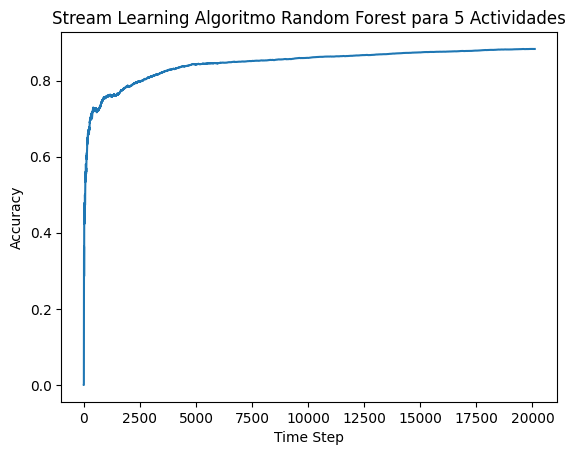

20102 samples analyzed.
Random Forest accuracy: 0.8829469704507015
Precision: 0.7252946093071381
F1-score: 0.7145067484626205


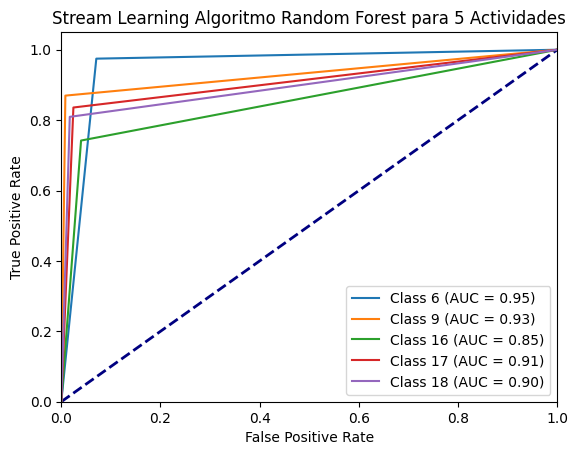

AUC for Class 0: 0.9519865518017636
AUC for Class 1: 0.9306891684652822
AUC for Class 2: 0.8510529490321611
AUC for Class 3: 0.9056985359562963
AUC for Class 4: 0.8960901466833381
Average AUC (macro): 0.91


In [ ]:
from skmultiflow.meta import AdaptiveRandomForestClassifier
from skmultiflow.data import SEAGenerator
from skmultiflow.data import DataStream
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import joblib


np.random.seed(42)


df = Datasetsin16_5.sample(frac=1)

target_idx = df.columns.get_loc("Activity")

# Crear el flujo de datos
stream = DataStream(df, target_idx=target_idx)


modelo = AdaptiveRandomForestClassifier()


n_samples = 0
correct_cnt = 0
max_samples = 25000

y_true = []
y_pred = []


accuracy_history = []


while n_samples < max_samples and stream.has_more_samples():

    X, y = stream.next_sample()
    y_pred_batch = modelo.predict(X)

    y_true.append(y[0])
    y_pred.append(y_pred_batch[0])

    if y[0] == y_pred_batch[0]:
        correct_cnt += 1

    modelo = modelo.partial_fit(X, y)
    n_samples += 1


    accuracy = correct_cnt / n_samples
    accuracy_history.append(accuracy)

joblib.dump(modelo, '/content/drive/MyDrive/TESIS_DATASET/Datasets definitivos_CSV/Modelos/Random_Forest_5_Actividades.pkl')


plt.figure()
plt.plot(range(len(accuracy_history)), accuracy_history)
plt.xlabel('Time Step')
plt.ylabel('Accuracy')
plt.title('Stream Learning Algoritmo Random Forest para 5 Actividades')
plt.savefig('/content/drive/MyDrive/TESIS_DATASET/Datasets definitivos_CSV/Graficas Accuracy /Random_Forest_stream_Dataset_5_Actividades.png', dpi=300, bbox_inches='tight')
plt.show()

###################################

# Calcular métricas
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')


print('{} samples analyzed.'.format(n_samples))
print('Random Forest accuracy: {}'.format(correct_cnt / n_samples))
print('Precision: {}'.format(precision))
print('F1-score: {}'.format(f1))

# Calcular métricas por clase
n_classes = len(np.unique(y_true))  # Número de clases en las etiquetas verdaderas
roc_auc_scores = []

for class_label in np.unique(y_true):
    y_true_class = [1 if label == class_label else 0 for label in y_true]  # Convierte a binario
    y_pred_class = [1 if pred == class_label else 0 for pred in y_pred]  # Convierte a binario
    auc_class = roc_auc_score(y_true_class, y_pred_class)
    roc_auc_scores.append(auc_class)

plt.figure()
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

for class_label in np.unique(y_true):
    y_true_class = [1 if label == class_label else 0 for label in y_true]
    y_pred_class = [1 if pred == class_label else 0 for pred in y_pred]
    fpr, tpr, _ = roc_curve(y_true_class, y_pred_class)
    auc_class = roc_auc_score(y_true_class, y_pred_class)
    plt.plot(fpr, tpr, label=f'Class {class_label} (AUC = {auc_class:.2f})')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Stream Learning Algoritmo Random Forest para 5 Actividades')
plt.legend(loc="lower right")
plt.savefig('/content/drive/MyDrive/TESIS_DATASET/Datasets definitivos_CSV/ROC/Random_Forests_5_Actividades.png', dpi=300, bbox_inches='tight')
plt.show()

# Imprimir AUC por clase
for class_label, auc_class in enumerate(roc_auc_scores):
    print(f'AUC for Class {class_label}: {auc_class}')

average_auc_macro = np.mean(roc_auc_scores)
print(f'Average AUC (macro): {average_auc_macro:.2f}')

In [ ]:
from skmultiflow.data import SEAGenerator
from skmultiflow.meta import AdaptiveRandomForestClassifier
from skmultiflow.data import DataStream
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import joblib

np.random.seed(42)


df = Datasetsin16.sample(frac=1)

target_idx = df.columns.get_loc("Activity")

# Crear el flujo de datos
stream = DataStream(df, target_idx=target_idx)


modelo = AdaptiveRandomForestClassifier()


n_samples = 0
correct_cnt = 0
max_samples = 250000

y_true = []
y_pred = []


accuracy_history = []


while n_samples < max_samples and stream.has_more_samples():

    X, y = stream.next_sample()
    y_pred_batch = modelo.predict(X)

    y_true.append(y[0])
    y_pred.append(y_pred_batch[0])

    if y[0] == y_pred_batch[0]:
        correct_cnt += 1

    modelo = modelo.partial_fit(X, y)
    n_samples += 1


    accuracy = correct_cnt / n_samples
    accuracy_history.append(accuracy)

joblib.dump(modelo, '/content/drive/MyDrive/TESIS_DATASET/Datasets definitivos_CSV/Modelos/Random_Forest_5_Actividades.pkl')



plt.figure()
plt.plot(range(len(accuracy_history)), accuracy_history)
plt.xlabel('Time Step')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Time')
plt.savefig('/content/drive/MyDrive/TESIS_DATASET/Datasets definitivos_CSV/Graficas Accuracy /Random_Forest_5_Actividades.png', dpi=300, bbox_inches='tight')
plt.show()

###################################

# Calcular métricas
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')


print('{} samples analyzed.'.format(n_samples))
print('Hoeffding accuracy: {}'.format(correct_cnt / n_samples))
print('Precision: {}'.format(precision))
print('F1-score: {}'.format(f1))

# Calcular métricas por clase
n_classes = len(np.unique(y_true))  # Número de clases en las etiquetas verdaderas
roc_auc_scores = []

for class_label in np.unique(y_true):
    y_true_class = [1 if label == class_label else 0 for label in y_true]  # Convierte a binario
    y_pred_class = [1 if pred == class_label else 0 for pred in y_pred]  # Convierte a binario
    auc_class = roc_auc_score(y_true_class, y_pred_class)
    roc_auc_scores.append(auc_class)

plt.figure()
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

for class_label in np.unique(y_true):
    y_true_class = [1 if label == class_label else 0 for label in y_true]
    y_pred_class = [1 if pred == class_label else 0 for pred in y_pred]
    fpr, tpr, _ = roc_curve(y_true_class, y_pred_class)
    auc_class = roc_auc_score(y_true_class, y_pred_class)
    plt.plot(fpr, tpr, label=f'Class {class_label} (AUC = {auc_class:.2f})')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Classes')
plt.legend(loc="lower right")
plt.savefig('/content/drive/MyDrive/TESIS_DATASET/Datasets definitivos_CSV/ROC/Random_Forest_5_Actividades.png', dpi=300, bbox_inches='tight')
plt.show()

average_auc_macro = np.mean(roc_auc_scores)
print(f'Average AUC (macro): {average_auc_macro:.2f}')

# Obtener los números de clase únicos desde la columna "Activity"
unique_classes = df["Activity"].unique()

# Crear un diccionario que asocie los números de clase con sus etiquetas correspondientes
class_labels_dict = {class_label: class_label for class_label in unique_classes}

# Calcular el accuracy por clase dividiendo el número de muestras correctamente clasificadas por el número total de muestras por clase
class_accuracy_percentage = []
for class_label in unique_classes:
    correct_for_class = sum(1 for true, pred in zip(y_true, y_pred) if true == class_label and true == pred)
    total_for_class = sum(1 for true in y_true if true == class_label)
    accuracy = correct_for_class / total_for_class
    class_accuracy_percentage.append(accuracy)

# Imprimir el accuracy por clase con el número de etiqueta
for class_label in unique_classes:
    accuracy = class_accuracy_percentage[unique_classes.tolist().index(class_label)]
    print(f'Accuracy for Class {class_label}: {accuracy:.2%}')

###KNN, random

####KNN, random, guardando toda la info

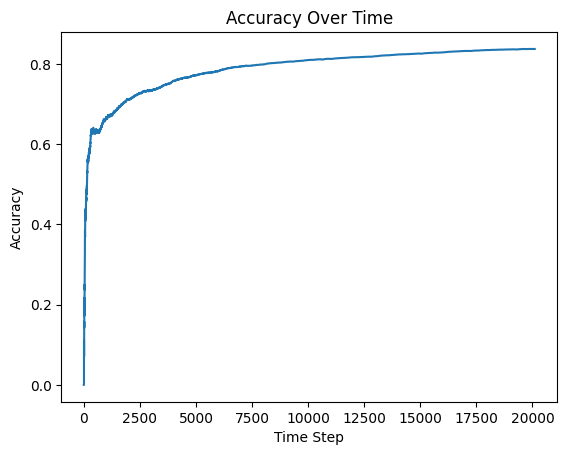

20102 samples analyzed.
Random Forest accuracy: 0.8370311411799821
Precision: 0.6871251374447541
F1-score: 0.6757776805278889


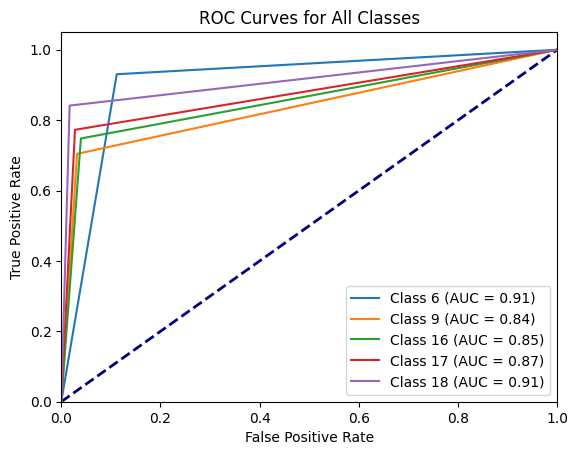

In [ ]:
from skmultiflow.lazy import KNNClassifier
from skmultiflow.data import SEAGenerator
from skmultiflow.data import DataStream
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import joblib


np.random.seed(42)


df = Datasetsin16_5.sample(frac=1)

target_idx = df.columns.get_loc("Activity")

# Crear el flujo de datos
stream = DataStream(df, target_idx=target_idx)


modelo = KNNClassifier(n_neighbors=5, max_window_size=None, leaf_size=30)


n_samples = 0
correct_cnt = 0
max_samples = 30000

y_true = []
y_pred = []


accuracy_history = []


while n_samples < max_samples and stream.has_more_samples():

    X, y = stream.next_sample()
    y_pred_batch = modelo.predict(X)

    y_true.append(y[0])
    y_pred.append(y_pred_batch[0])

    if y[0] == y_pred_batch[0]:
        correct_cnt += 1

    modelo = modelo.partial_fit(X, y)
    n_samples += 1


    accuracy = correct_cnt / n_samples
    accuracy_history.append(accuracy)

joblib.dump(modelo, '/content/drive/MyDrive/TESIS_DATASET/Datasets definitivos_CSV/Modelos/KNN_TODAS_LAS_FILAS_5_Actividades.pkl')


plt.figure()
plt.plot(range(len(accuracy_history)), accuracy_history)
plt.xlabel('Time Step')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Time')
plt.savefig('/content/drive/MyDrive/TESIS_DATASET/Datasets definitivos_CSV/Graficas Accuracy /KNN_TODAS_LAS_FILAS_5_Actividades.png', dpi=300, bbox_inches='tight')
plt.show()

###################################

# Calcular métricas
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')


print('{} samples analyzed.'.format(n_samples))
print('Random Forest accuracy: {}'.format(correct_cnt / n_samples))
print('Precision: {}'.format(precision))
print('F1-score: {}'.format(f1))

# Calcular métricas por clase
n_classes = len(np.unique(y_true))  # Número de clases en las etiquetas verdaderas
roc_auc_scores = []

for class_label in np.unique(y_true):
    y_true_class = [1 if label == class_label else 0 for label in y_true]  # Convierte a binario
    y_pred_class = [1 if pred == class_label else 0 for pred in y_pred]  # Convierte a binario
    auc_class = roc_auc_score(y_true_class, y_pred_class)
    roc_auc_scores.append(auc_class)

plt.figure()
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

for class_label in np.unique(y_true):
    y_true_class = [1 if label == class_label else 0 for label in y_true]
    y_pred_class = [1 if pred == class_label else 0 for pred in y_pred]
    fpr, tpr, _ = roc_curve(y_true_class, y_pred_class)
    auc_class = roc_auc_score(y_true_class, y_pred_class)
    plt.plot(fpr, tpr, label=f'Class {class_label} (AUC = {auc_class:.2f})')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Classes')
plt.legend(loc="lower right")
plt.savefig('/content/drive/MyDrive/TESIS_DATASET/Datasets definitivos_CSV/ROC/KNN_TODAS_LAS_FILAS_5_Actividades.png', dpi=300, bbox_inches='tight')
plt.show()

# Imprimir AUC por clase
for class_label, auc_class in enumerate(roc_auc_scores):
    print(f'AUC for Class {class_label}: {auc_class}')

average_auc_macro = np.mean(roc_auc_scores)
print(f'Average AUC (macro): {average_auc_macro:.2f}')

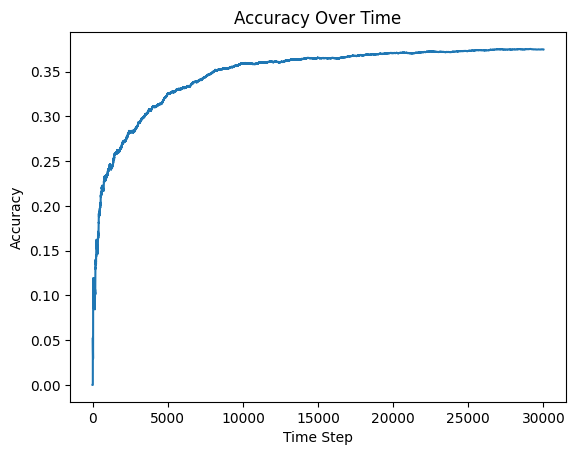

30000 samples analyzed.
Random Forest accuracy: 0.3747333333333333
Precision: 0.2606243378872053
F1-score: 0.2257645000991913


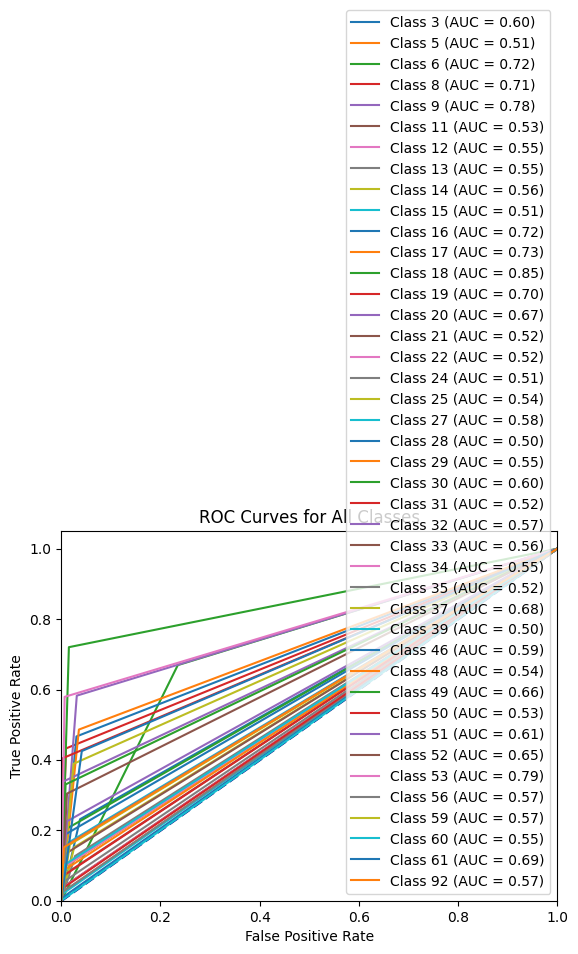

AUC for Class 0: 0.596849689844787
AUC for Class 1: 0.5105312468080461
AUC for Class 2: 0.7172005603332313
AUC for Class 3: 0.7115860365197235
AUC for Class 4: 0.7756513099605211
AUC for Class 5: 0.5340873354172586
AUC for Class 6: 0.5482035738004539
AUC for Class 7: 0.5495884052722139
AUC for Class 8: 0.5628704057727807
AUC for Class 9: 0.5085071521385885
AUC for Class 10: 0.7180470681864556
AUC for Class 11: 0.7253460641724303
AUC for Class 12: 0.8524823269287055
AUC for Class 13: 0.7011746735515965
AUC for Class 14: 0.6677984196961454
AUC for Class 15: 0.5175015567045239
AUC for Class 16: 0.5169546165764392
AUC for Class 17: 0.5109958909771695
AUC for Class 18: 0.5449850051517454
AUC for Class 19: 0.575488920822485
AUC for Class 20: 0.5033315625369991
AUC for Class 21: 0.5450778539653777
AUC for Class 22: 0.5974246759804747
AUC for Class 23: 0.5162748628783375
AUC for Class 24: 0.5742651682209056
AUC for Class 25: 0.5626789629521645
AUC for Class 26: 0.5453446794407877
AUC for Class

In [ ]:
from skmultiflow.data import SEAGenerator
from skmultiflow.lazy import KNNClassifier
from skmultiflow.data import DataStream
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import joblib

np.random.seed(42)


df = Datasetsin16.sample(frac=1)

target_idx = df.columns.get_loc("Activity")

# Crear el flujo de datos
stream = DataStream(df, target_idx=target_idx)


modelo = KNNClassifier(n_neighbors=5, max_window_size=5000, leaf_size=30)


n_samples = 0
correct_cnt = 0
max_samples = 30000

y_true = []
y_pred = []


accuracy_history = []


while n_samples < max_samples and stream.has_more_samples():

    X, y = stream.next_sample()
    y_pred_batch = modelo.predict(X)

    y_true.append(y[0])
    y_pred.append(y_pred_batch[0])

    if y[0] == y_pred_batch[0]:
        correct_cnt += 1

    modelo = modelo.partial_fit(X, y)
    n_samples += 1


    accuracy = correct_cnt / n_samples
    accuracy_history.append(accuracy)

joblib.dump(modelo, '/content/drive/MyDrive/TESIS_DATASET/Datasets definitivos_CSV/Modelos/KNN_Stream_5_Actividades.pkl')


plt.figure()
plt.plot(range(len(accuracy_history)), accuracy_history)
plt.xlabel('Time Step')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Time')
plt.savefig('/content/drive/MyDrive/TESIS_DATASET/Datasets definitivos_CSV/Graficas Accuracy /KNN_Stream_5_Actividades.png', dpi=300, bbox_inches='tight')
plt.show()

###################################

# Calcular métricas
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')


print('{} samples analyzed.'.format(n_samples))
print('Random Forest accuracy: {}'.format(correct_cnt / n_samples))
print('Precision: {}'.format(precision))
print('F1-score: {}'.format(f1))

# Calcular métricas por clase
n_classes = len(np.unique(y_true))  # Número de clases en las etiquetas verdaderas
roc_auc_scores = []

for class_label in np.unique(y_true):
    y_true_class = [1 if label == class_label else 0 for label in y_true]  # Convierte a binario
    y_pred_class = [1 if pred == class_label else 0 for pred in y_pred]  # Convierte a binario
    auc_class = roc_auc_score(y_true_class, y_pred_class)
    roc_auc_scores.append(auc_class)

plt.figure()
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

for class_label in np.unique(y_true):
    y_true_class = [1 if label == class_label else 0 for label in y_true]
    y_pred_class = [1 if pred == class_label else 0 for pred in y_pred]
    fpr, tpr, _ = roc_curve(y_true_class, y_pred_class)
    auc_class = roc_auc_score(y_true_class, y_pred_class)
    plt.plot(fpr, tpr, label=f'Class {class_label} (AUC = {auc_class:.2f})')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Classes')
plt.legend(loc="lower right")
plt.savefig('/content/drive/MyDrive/TESIS_DATASET/Datasets definitivos_CSV/ROC/KNN_Stream_5_Actividades.png', dpi=300, bbox_inches='tight')
plt.show()

# Imprimir AUC por clase
for class_label, auc_class in enumerate(roc_auc_scores):
    print(f'AUC for Class {class_label}: {auc_class}')

average_auc_macro = np.mean(roc_auc_scores)
print(f'Average AUC (macro): {average_auc_macro:.2f}')

####KNN, random, guardando 1000 filas

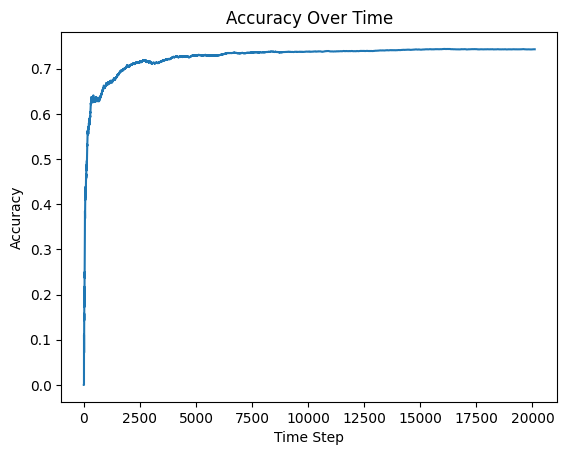

20102 samples analyzed.
Random Forest accuracy: 0.7428614068251915
Precision: 0.5857770220646955
F1-score: 0.5715034993968534


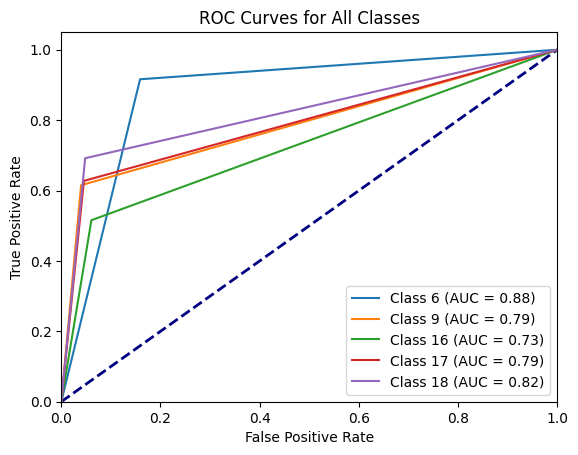

AUC for Class 0: 0.8786014823275196
AUC for Class 1: 0.7875798542601854
AUC for Class 2: 0.7274507374091933
AUC for Class 3: 0.7908891860138533
AUC for Class 4: 0.821814963896164
Average AUC (macro): 0.80


In [ ]:
from skmultiflow.lazy import KNNClassifier
from skmultiflow.data import SEAGenerator
from skmultiflow.data import DataStream
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import joblib

np.random.seed(42)


df = Datasetsin16_5.sample(frac=1)

target_idx = df.columns.get_loc("Activity")

# Crear el flujo de datos
stream = DataStream(df, target_idx=target_idx)


modelo = KNNClassifier(n_neighbors=5, max_window_size=1000, leaf_size=30)


n_samples = 0
correct_cnt = 0
max_samples = 30000

y_true = []
y_pred = []


accuracy_history = []


while n_samples < max_samples and stream.has_more_samples():

    X, y = stream.next_sample()
    y_pred_batch = modelo.predict(X)

    y_true.append(y[0])
    y_pred.append(y_pred_batch[0])

    if y[0] == y_pred_batch[0]:
        correct_cnt += 1

    modelo = modelo.partial_fit(X, y)
    n_samples += 1


    accuracy = correct_cnt / n_samples
    accuracy_history.append(accuracy)

joblib.dump(modelo, '/content/drive/MyDrive/TESIS_DATASET/Datasets definitivos_CSV/Modelos/KNN_1000Filas_5_Actividades.pkl')


plt.figure()
plt.plot(range(len(accuracy_history)), accuracy_history)
plt.xlabel('Time Step')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Time')
plt.savefig('/content/drive/MyDrive/TESIS_DATASET/Datasets definitivos_CSV/Graficas Accuracy /KNN_1000Filas_5_Actividades.png', dpi=300, bbox_inches='tight')
plt.show()

###################################

# Calcular métricas
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')


print('{} samples analyzed.'.format(n_samples))
print('Random Forest accuracy: {}'.format(correct_cnt / n_samples))
print('Precision: {}'.format(precision))
print('F1-score: {}'.format(f1))

# Calcular métricas por clase
n_classes = len(np.unique(y_true))  # Número de clases en las etiquetas verdaderas
roc_auc_scores = []

for class_label in np.unique(y_true):
    y_true_class = [1 if label == class_label else 0 for label in y_true]  # Convierte a binario
    y_pred_class = [1 if pred == class_label else 0 for pred in y_pred]  # Convierte a binario
    auc_class = roc_auc_score(y_true_class, y_pred_class)
    roc_auc_scores.append(auc_class)

plt.figure()
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

for class_label in np.unique(y_true):
    y_true_class = [1 if label == class_label else 0 for label in y_true]
    y_pred_class = [1 if pred == class_label else 0 for pred in y_pred]
    fpr, tpr, _ = roc_curve(y_true_class, y_pred_class)
    auc_class = roc_auc_score(y_true_class, y_pred_class)
    plt.plot(fpr, tpr, label=f'Class {class_label} (AUC = {auc_class:.2f})')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Classes')
plt.legend(loc="lower right")
plt.savefig('/content/drive/MyDrive/TESIS_DATASET/Datasets definitivos_CSV/ROC/KNN_1000Filas_5_Actividades.png', dpi=300, bbox_inches='tight')
plt.show()

# Imprimir AUC por clase
for class_label, auc_class in enumerate(roc_auc_scores):
    print(f'AUC for Class {class_label}: {auc_class}')

average_auc_macro = np.mean(roc_auc_scores)
print(f'Average AUC (macro): {average_auc_macro:.2f}')

####KNN, random, guardando 10000 filas

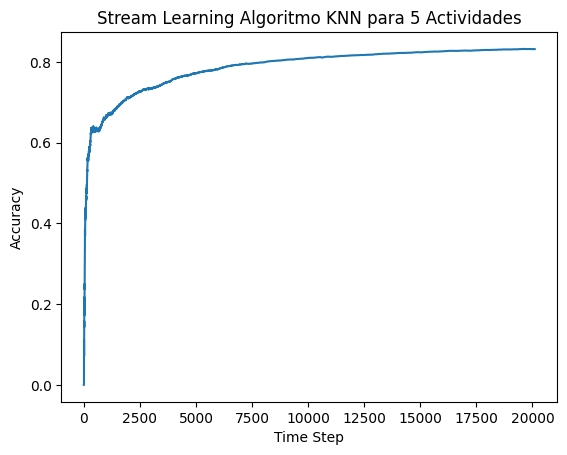

20102 samples analyzed.
Random Forest accuracy: 0.8314098099691573
Precision: 0.6817698320729327
F1-score: 0.6704013703230118


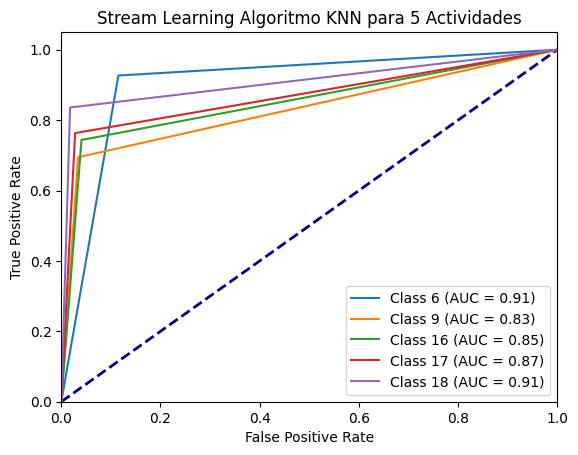

AUC for Class 0: 0.9057498233782535
AUC for Class 1: 0.8303307919380567
AUC for Class 2: 0.8514688931872784
AUC for Class 3: 0.8676209388709339
AUC for Class 4: 0.9090887314879094
Average AUC (macro): 0.87


In [ ]:
from skmultiflow.lazy import KNNClassifier
from skmultiflow.data import SEAGenerator
from skmultiflow.data import DataStream
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import joblib

np.random.seed(42)


df = Datasetsin16_5.sample(frac=1)

target_idx = df.columns.get_loc("Activity")

# Crear el flujo de datos
stream = DataStream(df, target_idx=target_idx)


modelo = KNNClassifier(n_neighbors=5, max_window_size=10000, leaf_size=30)


n_samples = 0
correct_cnt = 0
max_samples = 30000

y_true = []
y_pred = []


accuracy_history = []


while n_samples < max_samples and stream.has_more_samples():

    X, y = stream.next_sample()
    y_pred_batch = modelo.predict(X)

    y_true.append(y[0])
    y_pred.append(y_pred_batch[0])

    if y[0] == y_pred_batch[0]:
        correct_cnt += 1

    modelo = modelo.partial_fit(X, y)
    n_samples += 1


    accuracy = correct_cnt / n_samples
    accuracy_history.append(accuracy)

joblib.dump(modelo, '/content/drive/MyDrive/TESIS_DATASET/Datasets definitivos_CSV/Modelos/KNN_10000Filas_5_Actividades.pkl')


plt.figure()
plt.plot(range(len(accuracy_history)), accuracy_history)
plt.xlabel('Time Step')
plt.ylabel('Accuracy')
plt.title('Stream Learning Algoritmo KNN para 5 Actividades')
plt.savefig('/content/drive/MyDrive/TESIS_DATASET/Datasets definitivos_CSV/Graficas Accuracy /KNN_10000Filas_5_Actividades.png', dpi=300, bbox_inches='tight')
plt.show()

###################################

# Calcular métricas
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')


print('{} samples analyzed.'.format(n_samples))
print('Random Forest accuracy: {}'.format(correct_cnt / n_samples))
print('Precision: {}'.format(precision))
print('F1-score: {}'.format(f1))

# Calcular métricas por clase
n_classes = len(np.unique(y_true))  # Número de clases en las etiquetas verdaderas
roc_auc_scores = []

for class_label in np.unique(y_true):
    y_true_class = [1 if label == class_label else 0 for label in y_true]  # Convierte a binario
    y_pred_class = [1 if pred == class_label else 0 for pred in y_pred]  # Convierte a binario
    auc_class = roc_auc_score(y_true_class, y_pred_class)
    roc_auc_scores.append(auc_class)

plt.figure()
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

for class_label in np.unique(y_true):
    y_true_class = [1 if label == class_label else 0 for label in y_true]
    y_pred_class = [1 if pred == class_label else 0 for pred in y_pred]
    fpr, tpr, _ = roc_curve(y_true_class, y_pred_class)
    auc_class = roc_auc_score(y_true_class, y_pred_class)
    plt.plot(fpr, tpr, label=f'Class {class_label} (AUC = {auc_class:.2f})')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Stream Learning Algoritmo KNN para 5 Actividades')
plt.legend(loc="lower right")
plt.savefig('/content/drive/MyDrive/TESIS_DATASET/Datasets definitivos_CSV/ROC/KNN_10000Filas_5_Actividades.png', dpi=300, bbox_inches='tight')
plt.show()

# Imprimir AUC por clase
for class_label, auc_class in enumerate(roc_auc_scores):
    print(f'AUC for Class {class_label}: {auc_class}')

average_auc_macro = np.mean(roc_auc_scores)
print(f'Average AUC (macro): {average_auc_macro:.2f}')

##Todas las actividades

###Random Forest, No esta random

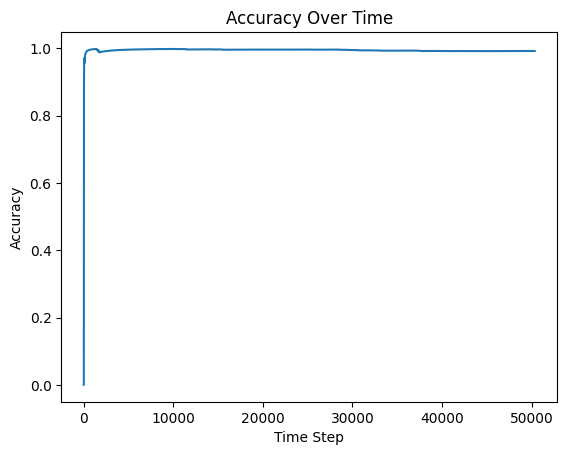

50360 samples analyzed.
Hoeffding accuracy: 0.9918784749801429
Precision: 0.9569540853571638
F1-score: 0.9556677947780501


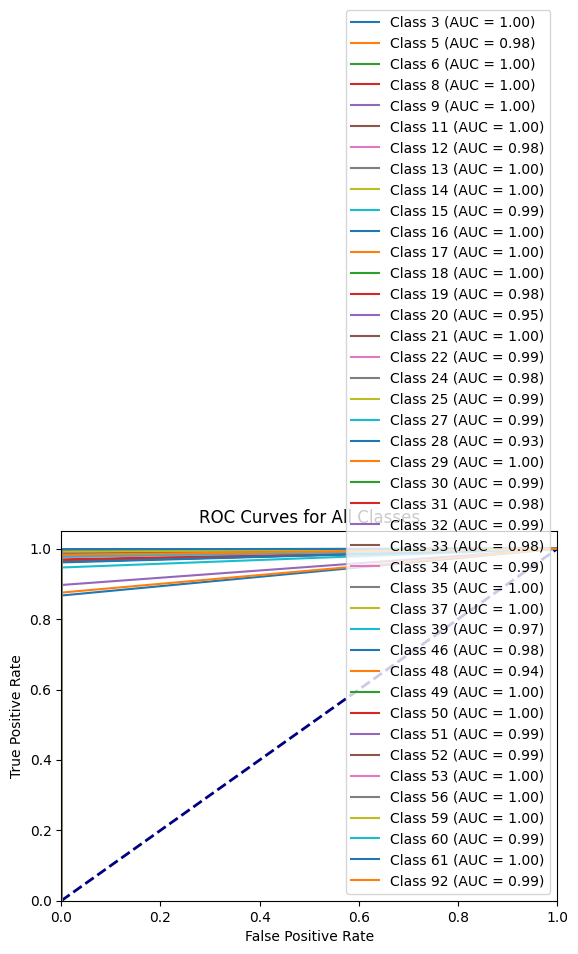

Average AUC (macro): 0.99
Accuracy for Class 3: 99.79%
Accuracy for Class 5: 96.81%
Accuracy for Class 6: 99.86%
Accuracy for Class 8: 99.53%
Accuracy for Class 9: 99.34%
Accuracy for Class 11: 99.37%
Accuracy for Class 12: 96.30%
Accuracy for Class 13: 99.32%
Accuracy for Class 14: 99.60%
Accuracy for Class 15: 98.28%
Accuracy for Class 16: 99.77%
Accuracy for Class 17: 99.48%
Accuracy for Class 18: 99.72%
Accuracy for Class 19: 96.97%
Accuracy for Class 20: 89.70%
Accuracy for Class 21: 99.16%
Accuracy for Class 22: 98.50%
Accuracy for Class 24: 96.34%
Accuracy for Class 25: 97.60%
Accuracy for Class 27: 98.59%
Accuracy for Class 28: 86.70%
Accuracy for Class 29: 99.41%
Accuracy for Class 30: 98.92%
Accuracy for Class 31: 96.75%
Accuracy for Class 32: 98.88%
Accuracy for Class 33: 96.30%
Accuracy for Class 34: 97.61%
Accuracy for Class 35: 99.71%
Accuracy for Class 37: 99.60%
Accuracy for Class 39: 94.67%
Accuracy for Class 46: 96.11%
Accuracy for Class 48: 87.54%
Accuracy for Class 

In [ ]:
from skmultiflow.data import SEAGenerator
from skmultiflow.meta import AdaptiveRandomForestClassifier
from skmultiflow.data import DataStream
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import joblib


df = Datasetsin16.copy()

target_idx = df.columns.get_loc("Activity")

# Crear el flujo de datos
stream = DataStream(df, target_idx=target_idx)


modelo = AdaptiveRandomForestClassifier()


n_samples = 0
correct_cnt = 0
max_samples = 60000

y_true = []
y_pred = []


accuracy_history = []


while n_samples < max_samples and stream.has_more_samples():

    X, y = stream.next_sample()
    y_pred_batch = modelo.predict(X)

    y_true.append(y[0])
    y_pred.append(y_pred_batch[0])

    if y[0] == y_pred_batch[0]:
        correct_cnt += 1

    modelo = modelo.partial_fit(X, y)
    n_samples += 1


    accuracy = correct_cnt / n_samples
    accuracy_history.append(accuracy)

joblib.dump(modelo, '/content/drive/MyDrive/TESIS_DATASET/Datasets definitivos_CSV/Modelos/randomforestsin16_todaslasactividades.pkl')


plt.figure()
plt.plot(range(len(accuracy_history)), accuracy_history)
plt.xlabel('Time Step')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Time')
plt.savefig('/content/drive/MyDrive/TESIS_DATASET/Datasets definitivos_CSV/Graficas Accuracy /randomforestsin16_todaslasactividades.png', dpi=300, bbox_inches='tight')
plt.show()

###################################

# Calcular métricas
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')


print('{} samples analyzed.'.format(n_samples))
print('Hoeffding accuracy: {}'.format(correct_cnt / n_samples))
print('Precision: {}'.format(precision))
print('F1-score: {}'.format(f1))

# Calcular métricas por clase
n_classes = len(np.unique(y_true))  # Número de clases en las etiquetas verdaderas
roc_auc_scores = []

for class_label in np.unique(y_true):
    y_true_class = [1 if label == class_label else 0 for label in y_true]  # Convierte a binario
    y_pred_class = [1 if pred == class_label else 0 for pred in y_pred]  # Convierte a binario
    auc_class = roc_auc_score(y_true_class, y_pred_class)
    roc_auc_scores.append(auc_class)

plt.figure()
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

for class_label in np.unique(y_true):
    y_true_class = [1 if label == class_label else 0 for label in y_true]
    y_pred_class = [1 if pred == class_label else 0 for pred in y_pred]
    fpr, tpr, _ = roc_curve(y_true_class, y_pred_class)
    auc_class = roc_auc_score(y_true_class, y_pred_class)
    plt.plot(fpr, tpr, label=f'Class {class_label} (AUC = {auc_class:.2f})')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Classes')
plt.legend(loc="lower right")
plt.savefig('/content/drive/MyDrive/TESIS_DATASET/Datasets definitivos_CSV/ROC/randomforestsin16_todaslasactividades.png', dpi=300, bbox_inches='tight')
plt.show()

average_auc_macro = np.mean(roc_auc_scores)
print(f'Average AUC (macro): {average_auc_macro:.2f}')

# Obtener los números de clase únicos desde la columna "Activity"
unique_classes = df["Activity"].unique()

# Crear un diccionario que asocie los números de clase con sus etiquetas correspondientes
class_labels_dict = {class_label: class_label for class_label in unique_classes}

# Calcular el accuracy por clase dividiendo el número de muestras correctamente clasificadas por el número total de muestras por clase
class_accuracy_percentage = []
for class_label in unique_classes:
    correct_for_class = sum(1 for true, pred in zip(y_true, y_pred) if true == class_label and true == pred)
    total_for_class = sum(1 for true in y_true if true == class_label)
    accuracy = correct_for_class / total_for_class
    class_accuracy_percentage.append(accuracy)

# Imprimir el accuracy por clase con el número de etiqueta
for class_label in unique_classes:
    accuracy = class_accuracy_percentage[unique_classes.tolist().index(class_label)]
    print(f'Accuracy for Class {class_label}: {accuracy:.2%}')

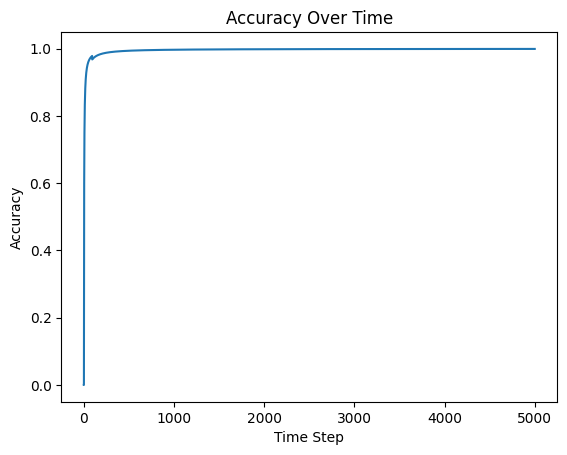

In [ ]:
from skmultiflow.meta import AdaptiveRandomForestClassifier
from skmultiflow.data import SEAGenerator
from skmultiflow.data import DataStream
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import joblib

df = Datasetsin16.copy()

target_idx = df.columns.get_loc("Activity")

# Crear el flujo de datos
stream = DataStream(df, target_idx=target_idx)


modelo = AdaptiveRandomForestClassifier()


n_samples = 0
correct_cnt = 0
max_samples = 5000

y_true = []
y_pred = []


accuracy_history = []


while n_samples < max_samples and stream.has_more_samples():

    X, y = stream.next_sample()
    y_pred_batch = modelo.predict(X)

    y_true.append(y[0])
    y_pred.append(y_pred_batch[0])

    if y[0] == y_pred_batch[0]:
        correct_cnt += 1

    modelo = modelo.partial_fit(X, y)
    n_samples += 1


    accuracy = correct_cnt / n_samples
    accuracy_history.append(accuracy)


plt.figure()
plt.plot(range(len(accuracy_history)), accuracy_history)
plt.xlabel('Time Step')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Time')
#plt.savefig('/content/drive/MyDrive/TESIS_DATASET/Datasets definitivos_CSV/Graficas Accuracy /Random_Forest_stream_70.png', dpi=300, bbox_inches='tight')
plt.show()


###Random Forest, Random

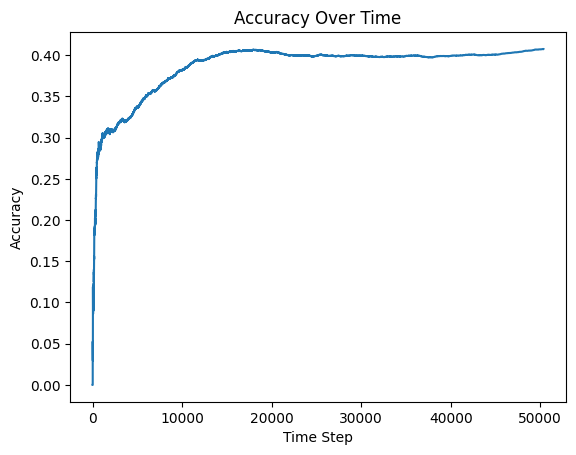

50360 samples analyzed.
Hoeffding accuracy: 0.40762509928514695
Precision: 0.403536841810666
F1-score: 0.36664681254944853


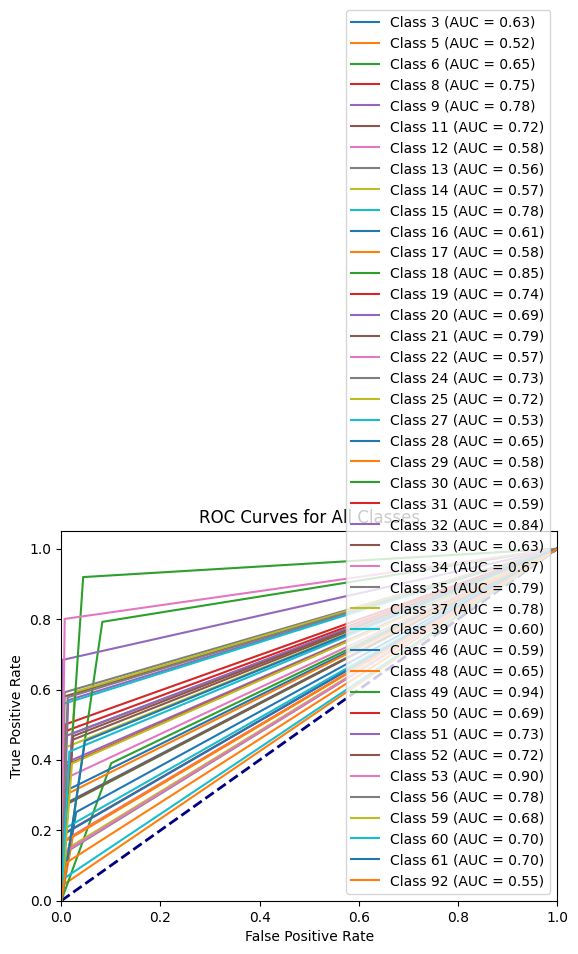

Average AUC (macro): 0.68
Accuracy for Class 32: 68.39%
Accuracy for Class 5: 4.26%
Accuracy for Class 6: 39.08%
Accuracy for Class 16: 25.17%
Accuracy for Class 34: 34.49%
Accuracy for Class 17: 18.37%
Accuracy for Class 59: 39.01%
Accuracy for Class 9: 56.97%
Accuracy for Class 27: 6.21%
Accuracy for Class 18: 79.23%
Accuracy for Class 30: 26.67%
Accuracy for Class 33: 27.02%
Accuracy for Class 53: 80.06%
Accuracy for Class 31: 18.97%
Accuracy for Class 19: 47.88%
Accuracy for Class 22: 13.50%
Accuracy for Class 61: 45.40%
Accuracy for Class 35: 59.23%
Accuracy for Class 21: 57.98%
Accuracy for Class 52: 46.76%
Accuracy for Class 56: 57.78%
Accuracy for Class 14: 14.84%
Accuracy for Class 49: 91.95%
Accuracy for Class 92: 10.90%
Accuracy for Class 37: 59.36%
Accuracy for Class 13: 14.29%
Accuracy for Class 60: 42.36%
Accuracy for Class 48: 29.91%
Accuracy for Class 3: 27.79%
Accuracy for Class 25: 43.11%
Accuracy for Class 50: 38.77%
Accuracy for Class 12: 16.67%
Accuracy for Class 1

In [ ]:
from skmultiflow.data import SEAGenerator
from skmultiflow.meta import AdaptiveRandomForestClassifier
from skmultiflow.data import DataStream
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import joblib

np.random.seed(42)


df = Datasetsin16.sample(frac=1)

target_idx = df.columns.get_loc("Activity")

# Crear el flujo de datos
stream = DataStream(df, target_idx=target_idx)


modelo = AdaptiveRandomForestClassifier()


n_samples = 0
correct_cnt = 0
max_samples = 60000

y_true = []
y_pred = []


accuracy_history = []


while n_samples < max_samples and stream.has_more_samples():

    X, y = stream.next_sample()
    y_pred_batch = modelo.predict(X)

    y_true.append(y[0])
    y_pred.append(y_pred_batch[0])

    if y[0] == y_pred_batch[0]:
        correct_cnt += 1

    modelo = modelo.partial_fit(X, y)
    n_samples += 1


    accuracy = correct_cnt / n_samples
    accuracy_history.append(accuracy)

joblib.dump(modelo, '/content/drive/MyDrive/TESIS_DATASET/Datasets definitivos_CSV/Modelos/randomforestsin16_todaslasactividades_random.pkl')


plt.figure()
plt.plot(range(len(accuracy_history)), accuracy_history)
plt.xlabel('Time Step')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Time')
plt.savefig('/content/drive/MyDrive/TESIS_DATASET/Datasets definitivos_CSV/Graficas Accuracy /randomforestsin16_todaslasactividades_random.png', dpi=300, bbox_inches='tight')
plt.show()

###################################

# Calcular métricas
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')


print('{} samples analyzed.'.format(n_samples))
print('Hoeffding accuracy: {}'.format(correct_cnt / n_samples))
print('Precision: {}'.format(precision))
print('F1-score: {}'.format(f1))

# Calcular métricas por clase
n_classes = len(np.unique(y_true))  # Número de clases en las etiquetas verdaderas
roc_auc_scores = []

for class_label in np.unique(y_true):
    y_true_class = [1 if label == class_label else 0 for label in y_true]  # Convierte a binario
    y_pred_class = [1 if pred == class_label else 0 for pred in y_pred]  # Convierte a binario
    auc_class = roc_auc_score(y_true_class, y_pred_class)
    roc_auc_scores.append(auc_class)

plt.figure()
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

for class_label in np.unique(y_true):
    y_true_class = [1 if label == class_label else 0 for label in y_true]
    y_pred_class = [1 if pred == class_label else 0 for pred in y_pred]
    fpr, tpr, _ = roc_curve(y_true_class, y_pred_class)
    auc_class = roc_auc_score(y_true_class, y_pred_class)
    plt.plot(fpr, tpr, label=f'Class {class_label} (AUC = {auc_class:.2f})')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Classes')
plt.legend(loc="lower right")
plt.savefig('/content/drive/MyDrive/TESIS_DATASET/Datasets definitivos_CSV/ROC/randomforestsin16_todaslasactividades_random.png', dpi=300, bbox_inches='tight')
plt.show()

average_auc_macro = np.mean(roc_auc_scores)
print(f'Average AUC (macro): {average_auc_macro:.2f}')

# Obtener los números de clase únicos desde la columna "Activity"
unique_classes = df["Activity"].unique()

# Crear un diccionario que asocie los números de clase con sus etiquetas correspondientes
class_labels_dict = {class_label: class_label for class_label in unique_classes}

# Calcular el accuracy por clase dividiendo el número de muestras correctamente clasificadas por el número total de muestras por clase
class_accuracy_percentage = []
for class_label in unique_classes:
    correct_for_class = sum(1 for true, pred in zip(y_true, y_pred) if true == class_label and true == pred)
    total_for_class = sum(1 for true in y_true if true == class_label)
    accuracy = correct_for_class / total_for_class
    class_accuracy_percentage.append(accuracy)

# Imprimir el accuracy por clase con el número de etiqueta
for class_label in unique_classes:
    accuracy = class_accuracy_percentage[unique_classes.tolist().index(class_label)]
    print(f'Accuracy for Class {class_label}: {accuracy:.2%}')

###KNN, random, guardando toda la info

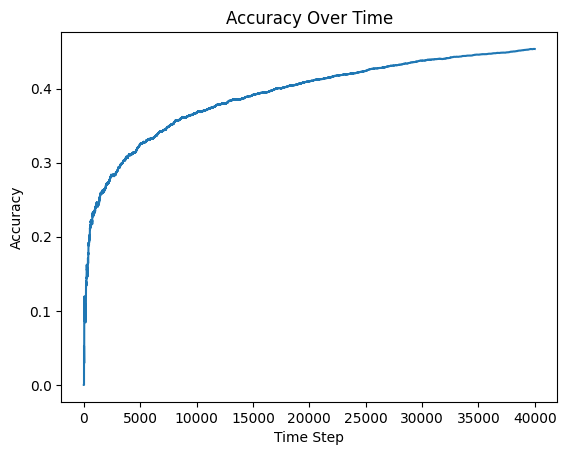

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


40000 samples analyzed.
Random Forest accuracy: 0.453425
Precision: 0.3423247664855264
F1-score: 0.29819898566819186


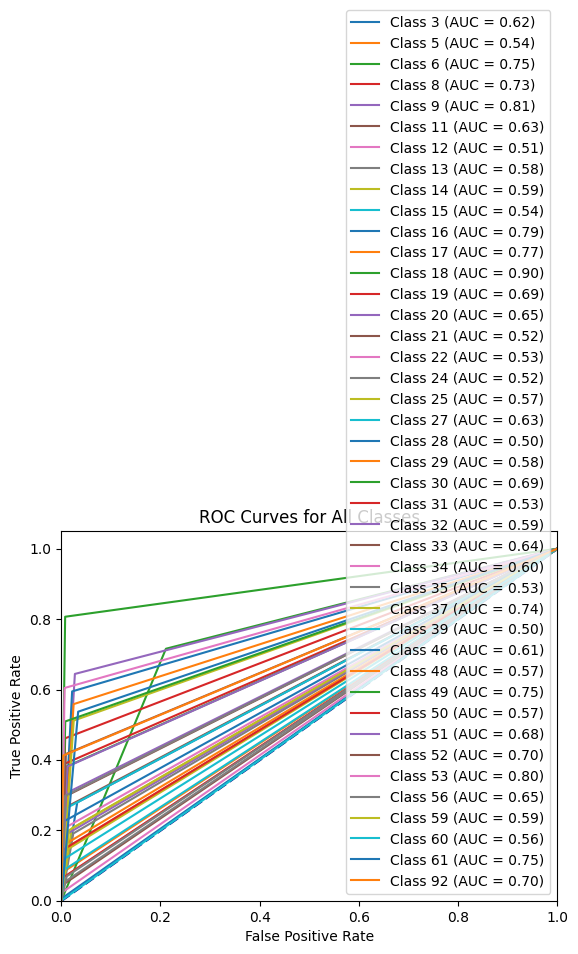

AUC for Class 0: 0.6235106601918791
AUC for Class 1: 0.5389078513058112
AUC for Class 2: 0.7524350538972893
AUC for Class 3: 0.7268051770944238
AUC for Class 4: 0.8084159662293865
AUC for Class 5: 0.6286194689618891
AUC for Class 6: 0.5109859703277297
AUC for Class 7: 0.5833833881075255
AUC for Class 8: 0.592126995445897
AUC for Class 9: 0.5412053510881822
AUC for Class 10: 0.7863925693909656
AUC for Class 11: 0.7667901732724511
AUC for Class 12: 0.8994741962714435
AUC for Class 13: 0.6920405520034295
AUC for Class 14: 0.6490831462723331
AUC for Class 15: 0.5210405250647485
AUC for Class 16: 0.5306837879749882
AUC for Class 17: 0.5235211153227907
AUC for Class 18: 0.5673669238012164
AUC for Class 19: 0.6261452462867727
AUC for Class 20: 0.5027911500049782
AUC for Class 21: 0.5761641406758261
AUC for Class 22: 0.6863565386978019
AUC for Class 23: 0.5310469144123152
AUC for Class 24: 0.5897040819013182
AUC for Class 25: 0.6444711554855385
AUC for Class 26: 0.6001516646612883
AUC for Clas

In [ ]:
from skmultiflow.lazy import KNNClassifier
from skmultiflow.data import SEAGenerator
from skmultiflow.data import DataStream
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import joblib

np.random.seed(42)


df = Datasetsin16.sample(frac=1)

target_idx = df.columns.get_loc("Activity")

# Crear el flujo de datos
stream = DataStream(df, target_idx=target_idx)


modelo = KNNClassifier(n_neighbors=5, max_window_size=None, leaf_size=30)


n_samples = 0
correct_cnt = 0
max_samples = 40000

y_true = []
y_pred = []


accuracy_history = []


while n_samples < max_samples and stream.has_more_samples():

    X, y = stream.next_sample()
    y_pred_batch = modelo.predict(X)

    y_true.append(y[0])
    y_pred.append(y_pred_batch[0])

    if y[0] == y_pred_batch[0]:
        correct_cnt += 1

    modelo = modelo.partial_fit(X, y)
    n_samples += 1


    accuracy = correct_cnt / n_samples
    accuracy_history.append(accuracy)

joblib.dump(modelo, '/content/drive/MyDrive/TESIS_DATASET/Datasets definitivos_CSV/Modelos/KNN_TODAS_LAS_FILAS.pkl')


plt.figure()
plt.plot(range(len(accuracy_history)), accuracy_history)
plt.xlabel('Time Step')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Time')
plt.savefig('/content/drive/MyDrive/TESIS_DATASET/Datasets definitivos_CSV/Graficas Accuracy /KNN_TODAS_LAS_FILAS.png', dpi=300, bbox_inches='tight')
plt.show()

###################################

# Calcular métricas
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')


print('{} samples analyzed.'.format(n_samples))
print('Random Forest accuracy: {}'.format(correct_cnt / n_samples))
print('Precision: {}'.format(precision))
print('F1-score: {}'.format(f1))

# Calcular métricas por clase
n_classes = len(np.unique(y_true))  # Número de clases en las etiquetas verdaderas
roc_auc_scores = []

for class_label in np.unique(y_true):
    y_true_class = [1 if label == class_label else 0 for label in y_true]  # Convierte a binario
    y_pred_class = [1 if pred == class_label else 0 for pred in y_pred]  # Convierte a binario
    auc_class = roc_auc_score(y_true_class, y_pred_class)
    roc_auc_scores.append(auc_class)

plt.figure()
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

for class_label in np.unique(y_true):
    y_true_class = [1 if label == class_label else 0 for label in y_true]
    y_pred_class = [1 if pred == class_label else 0 for pred in y_pred]
    fpr, tpr, _ = roc_curve(y_true_class, y_pred_class)
    auc_class = roc_auc_score(y_true_class, y_pred_class)
    plt.plot(fpr, tpr, label=f'Class {class_label} (AUC = {auc_class:.2f})')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Classes')
plt.legend(loc="lower right")
plt.savefig('/content/drive/MyDrive/TESIS_DATASET/Datasets definitivos_CSV/ROC/KNN_TODAS_LAS_FILAS.png', dpi=300, bbox_inches='tight')
plt.show()

# Imprimir AUC por clase
for class_label, auc_class in enumerate(roc_auc_scores):
    print(f'AUC for Class {class_label}: {auc_class}')

average_auc_macro = np.mean(roc_auc_scores)
print(f'Average AUC (macro): {average_auc_macro:.2f}')

###KNN, random, solo guardando 2000 filas

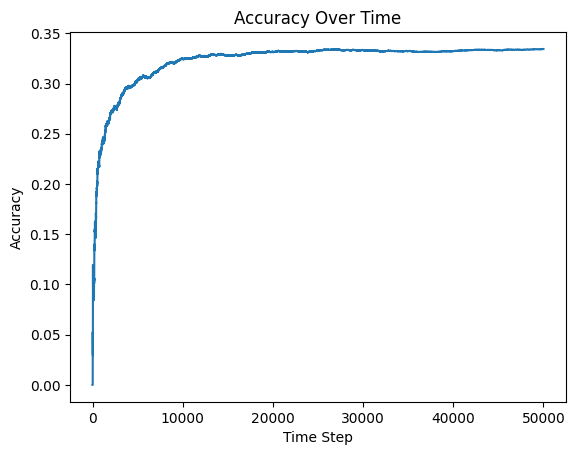

50000 samples analyzed.
Random Forest accuracy: 0.33444
Precision: 0.22620233448450094
F1-score: 0.18994804660260203


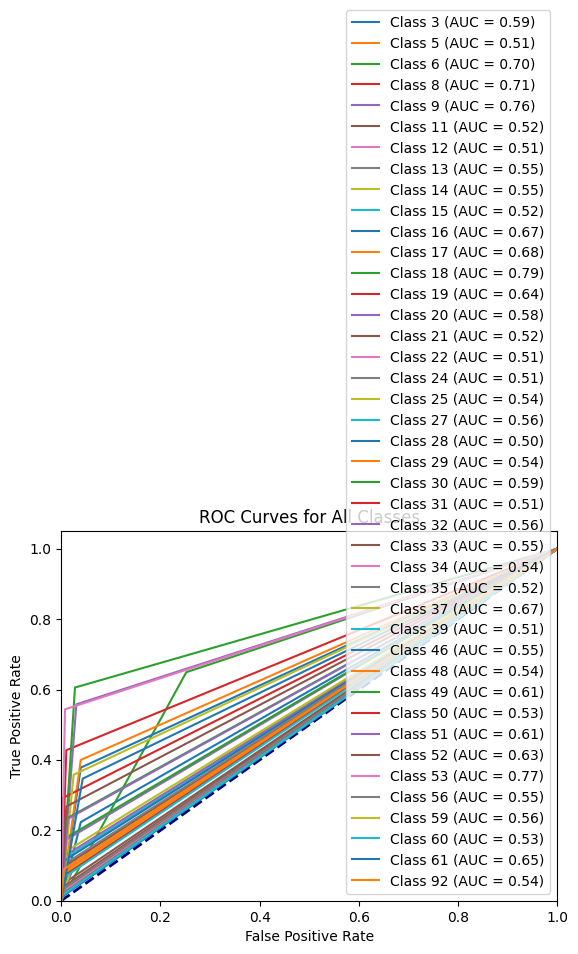

AUC for Class 0: 0.5920350881086256
AUC for Class 1: 0.5137742966180144
AUC for Class 2: 0.6985795518529814
AUC for Class 3: 0.7087353425299188
AUC for Class 4: 0.7637482743961322
AUC for Class 5: 0.5220593672191635
AUC for Class 6: 0.5089489240972843
AUC for Class 7: 0.5460375189238493
AUC for Class 8: 0.5455584685858481
AUC for Class 9: 0.5168916290203726
AUC for Class 10: 0.6693695897417098
AUC for Class 11: 0.6802851017972383
AUC for Class 12: 0.7890117733756022
AUC for Class 13: 0.6446418636044402
AUC for Class 14: 0.5822903524385201
AUC for Class 15: 0.5176811504251672
AUC for Class 16: 0.5120644392477309
AUC for Class 17: 0.5088111784294098
AUC for Class 18: 0.5351053957343275
AUC for Class 19: 0.5567626953125
AUC for Class 20: 0.5048055664012283
AUC for Class 21: 0.537998033463331
AUC for Class 22: 0.5850582761338141
AUC for Class 23: 0.5149846347377568
AUC for Class 24: 0.5605839786609557
AUC for Class 25: 0.5458033405004519
AUC for Class 26: 0.5389740916674735
AUC for Class 2

In [ ]:
from skmultiflow.lazy import KNNClassifier
from skmultiflow.data import SEAGenerator
from skmultiflow.data import DataStream
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import joblib

np.random.seed(42)


df = Datasetsin16.sample(frac=1)

target_idx = df.columns.get_loc("Activity")

# Crear el flujo de datos
stream = DataStream(df, target_idx=target_idx)


modelo = KNNClassifier(n_neighbors=5, max_window_size=2000, leaf_size=30)


n_samples = 0
correct_cnt = 0
max_samples = 50000

y_true = []
y_pred = []


accuracy_history = []


while n_samples < max_samples and stream.has_more_samples():

    X, y = stream.next_sample()
    y_pred_batch = modelo.predict(X)

    y_true.append(y[0])
    y_pred.append(y_pred_batch[0])

    if y[0] == y_pred_batch[0]:
        correct_cnt += 1

    modelo = modelo.partial_fit(X, y)
    n_samples += 1


    accuracy = correct_cnt / n_samples
    accuracy_history.append(accuracy)

joblib.dump(modelo, '/content/drive/MyDrive/TESIS_DATASET/Datasets definitivos_CSV/Modelos/KNN_2000_FILAS.pkl')


plt.figure()
plt.plot(range(len(accuracy_history)), accuracy_history)
plt.xlabel('Time Step')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Time')
plt.savefig('/content/drive/MyDrive/TESIS_DATASET/Datasets definitivos_CSV/Graficas Accuracy /KNN_2000_FILAS.png', dpi=300, bbox_inches='tight')
plt.show()

###################################

# Calcular métricas
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')


print('{} samples analyzed.'.format(n_samples))
print('Random Forest accuracy: {}'.format(correct_cnt / n_samples))
print('Precision: {}'.format(precision))
print('F1-score: {}'.format(f1))

# Calcular métricas por clase
n_classes = len(np.unique(y_true))  # Número de clases en las etiquetas verdaderas
roc_auc_scores = []

for class_label in np.unique(y_true):
    y_true_class = [1 if label == class_label else 0 for label in y_true]  # Convierte a binario
    y_pred_class = [1 if pred == class_label else 0 for pred in y_pred]  # Convierte a binario
    auc_class = roc_auc_score(y_true_class, y_pred_class)
    roc_auc_scores.append(auc_class)

plt.figure()
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

for class_label in np.unique(y_true):
    y_true_class = [1 if label == class_label else 0 for label in y_true]
    y_pred_class = [1 if pred == class_label else 0 for pred in y_pred]
    fpr, tpr, _ = roc_curve(y_true_class, y_pred_class)
    auc_class = roc_auc_score(y_true_class, y_pred_class)
    plt.plot(fpr, tpr, label=f'Class {class_label} (AUC = {auc_class:.2f})')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Classes')
plt.legend(loc="lower right")
plt.savefig('/content/drive/MyDrive/TESIS_DATASET/Datasets definitivos_CSV/ROC/KNN_2000_FILAS.png', dpi=300, bbox_inches='tight')
plt.show()

# Imprimir AUC por clase
for class_label, auc_class in enumerate(roc_auc_scores):
    print(f'AUC for Class {class_label}: {auc_class}')

average_auc_macro = np.mean(roc_auc_scores)
print(f'Average AUC (macro): {average_auc_macro:.2f}')

##Entrenamiento con 7 actividades

###Random Forest, Random

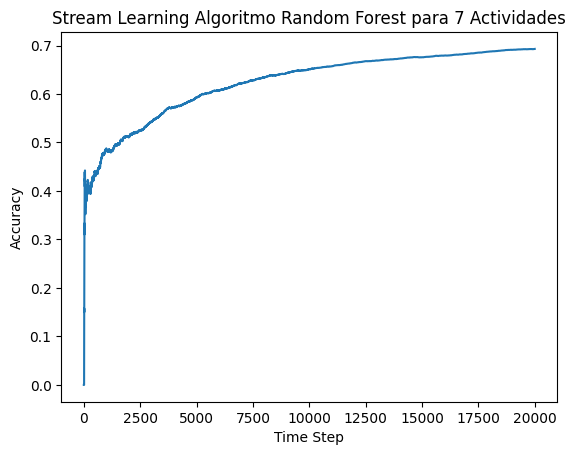

20000 samples analyzed.
Random Forest accuracy: 0.69295
Precision: 0.6179583066865898
F1-score: 0.5176205601160326


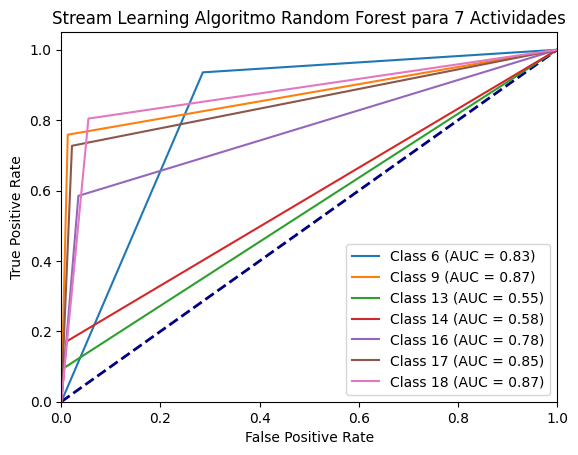

AUC for Class 0: 0.8251196517377167
AUC for Class 1: 0.8727669952395369
AUC for Class 2: 0.5452576701627628
AUC for Class 3: 0.5803477614524248
AUC for Class 4: 0.7751714285714286
AUC for Class 5: 0.8527762837372178
AUC for Class 6: 0.874829298281456
Average AUC (macro): 0.76


In [ ]:
from skmultiflow.meta import AdaptiveRandomForestClassifier
from skmultiflow.data import SEAGenerator
from skmultiflow.data import DataStream
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import joblib


np.random.seed(42)


df = Datasetsin16_7.sample(frac=1)

target_idx = df.columns.get_loc("Activity")

# Crear el flujo de datos
stream = DataStream(df, target_idx=target_idx)


modelo = AdaptiveRandomForestClassifier()


n_samples = 0
correct_cnt = 0
max_samples = 20000

y_true = []
y_pred = []


accuracy_history = []


while n_samples < max_samples and stream.has_more_samples():

    X, y = stream.next_sample()
    y_pred_batch = modelo.predict(X)

    y_true.append(y[0])
    y_pred.append(y_pred_batch[0])

    if y[0] == y_pred_batch[0]:
        correct_cnt += 1

    modelo = modelo.partial_fit(X, y)
    n_samples += 1


    accuracy = correct_cnt / n_samples
    accuracy_history.append(accuracy)

joblib.dump(modelo, '/content/drive/MyDrive/TESIS_DATASET/Datasets definitivos_CSV/Modelos/Random_Forest_7_Actividades.pkl')


plt.figure()
plt.plot(range(len(accuracy_history)), accuracy_history)
plt.xlabel('Time Step')
plt.ylabel('Accuracy')
plt.title('Stream Learning Algoritmo Random Forest para 7 Actividades')
plt.savefig('/content/drive/MyDrive/TESIS_DATASET/Datasets definitivos_CSV/Graficas Accuracy /Random_Forest_stream_Dataset_7_Actividades.png', dpi=300, bbox_inches='tight')
plt.show()

###################################

# Calcular métricas
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')


print('{} samples analyzed.'.format(n_samples))
print('Random Forest accuracy: {}'.format(correct_cnt / n_samples))
print('Precision: {}'.format(precision))
print('F1-score: {}'.format(f1))

# Calcular métricas por clase
n_classes = len(np.unique(y_true))  # Número de clases en las etiquetas verdaderas
roc_auc_scores = []

for class_label in np.unique(y_true):
    y_true_class = [1 if label == class_label else 0 for label in y_true]  # Convierte a binario
    y_pred_class = [1 if pred == class_label else 0 for pred in y_pred]  # Convierte a binario
    auc_class = roc_auc_score(y_true_class, y_pred_class)
    roc_auc_scores.append(auc_class)

plt.figure()
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

for class_label in np.unique(y_true):
    y_true_class = [1 if label == class_label else 0 for label in y_true]
    y_pred_class = [1 if pred == class_label else 0 for pred in y_pred]
    fpr, tpr, _ = roc_curve(y_true_class, y_pred_class)
    auc_class = roc_auc_score(y_true_class, y_pred_class)
    plt.plot(fpr, tpr, label=f'Class {class_label} (AUC = {auc_class:.2f})')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Stream Learning Algoritmo Random Forest para 7 Actividades')
plt.legend(loc="lower right")
plt.savefig('/content/drive/MyDrive/TESIS_DATASET/Datasets definitivos_CSV/ROC/Random_Forests_7_Actividades.png', dpi=300, bbox_inches='tight')
plt.show()

# Imprimir AUC por clase
for class_label, auc_class in enumerate(roc_auc_scores):
    print(f'AUC for Class {class_label}: {auc_class}')

average_auc_macro = np.mean(roc_auc_scores)
print(f'Average AUC (macro): {average_auc_macro:.2f}')

###KNN, random, guardando toda la info

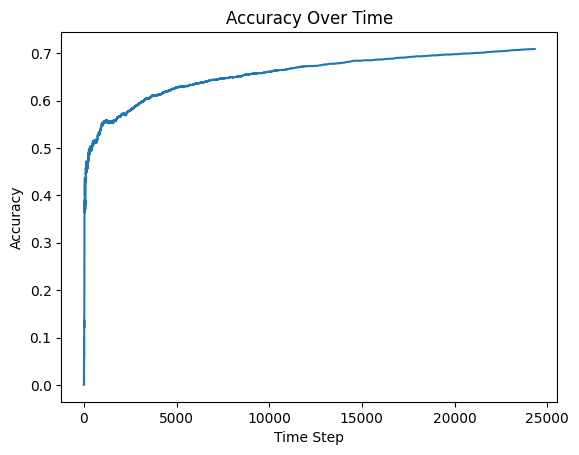

24327 samples analyzed.
Random Forest accuracy: 0.7088831339663748
Precision: 0.5992613316923903
F1-score: 0.5635322416852139


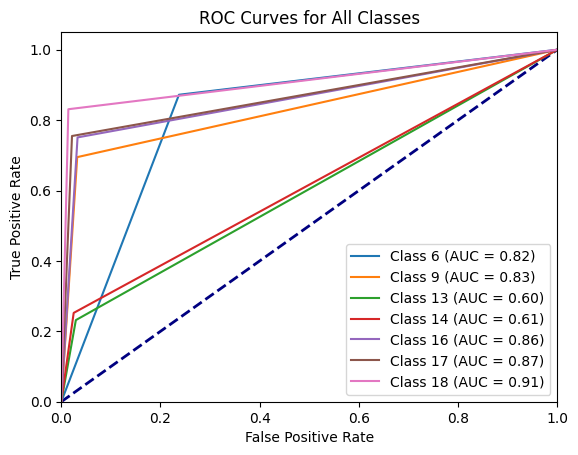

AUC for Class 0: 0.8173985212421989
AUC for Class 1: 0.8313682702837696
AUC for Class 2: 0.6012349963366831
AUC for Class 3: 0.6136673153887233
AUC for Class 4: 0.8590457944229632
AUC for Class 5: 0.8666324589678935
AUC for Class 6: 0.9083470705791118
Average AUC (macro): 0.79


In [ ]:
from skmultiflow.lazy import KNNClassifier
from skmultiflow.data import SEAGenerator
from skmultiflow.data import DataStream
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import joblib


np.random.seed(42)


df = Datasetsin16_7.sample(frac=1)

target_idx = df.columns.get_loc("Activity")

# Crear el flujo de datos
stream = DataStream(df, target_idx=target_idx)


modelo = KNNClassifier(n_neighbors=5, max_window_size=None, leaf_size=30)


n_samples = 0
correct_cnt = 0
max_samples = 50000

y_true = []
y_pred = []


accuracy_history = []


while n_samples < max_samples and stream.has_more_samples():

    X, y = stream.next_sample()
    y_pred_batch = modelo.predict(X)

    y_true.append(y[0])
    y_pred.append(y_pred_batch[0])

    if y[0] == y_pred_batch[0]:
        correct_cnt += 1

    modelo = modelo.partial_fit(X, y)
    n_samples += 1


    accuracy = correct_cnt / n_samples
    accuracy_history.append(accuracy)

joblib.dump(modelo, '/content/drive/MyDrive/TESIS_DATASET/Datasets definitivos_CSV/Modelos/KNN_TODAS_LAS_FILAS_7_Actividades.pkl')


plt.figure()
plt.plot(range(len(accuracy_history)), accuracy_history)
plt.xlabel('Time Step')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Time')
plt.savefig('/content/drive/MyDrive/TESIS_DATASET/Datasets definitivos_CSV/Graficas Accuracy /KNN_TODAS_LAS_FILAS_7_Actividades.png', dpi=300, bbox_inches='tight')
plt.show()

###################################

# Calcular métricas
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')


print('{} samples analyzed.'.format(n_samples))
print('Random Forest accuracy: {}'.format(correct_cnt / n_samples))
print('Precision: {}'.format(precision))
print('F1-score: {}'.format(f1))

# Calcular métricas por clase
n_classes = len(np.unique(y_true))  # Número de clases en las etiquetas verdaderas
roc_auc_scores = []

for class_label in np.unique(y_true):
    y_true_class = [1 if label == class_label else 0 for label in y_true]  # Convierte a binario
    y_pred_class = [1 if pred == class_label else 0 for pred in y_pred]  # Convierte a binario
    auc_class = roc_auc_score(y_true_class, y_pred_class)
    roc_auc_scores.append(auc_class)

plt.figure()
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

for class_label in np.unique(y_true):
    y_true_class = [1 if label == class_label else 0 for label in y_true]
    y_pred_class = [1 if pred == class_label else 0 for pred in y_pred]
    fpr, tpr, _ = roc_curve(y_true_class, y_pred_class)
    auc_class = roc_auc_score(y_true_class, y_pred_class)
    plt.plot(fpr, tpr, label=f'Class {class_label} (AUC = {auc_class:.2f})')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Classes')
plt.legend(loc="lower right")
plt.savefig('/content/drive/MyDrive/TESIS_DATASET/Datasets definitivos_CSV/ROC/KNN_TODAS_LAS_FILAS_7_Actividades.png', dpi=300, bbox_inches='tight')
plt.show()

# Imprimir AUC por clase
for class_label, auc_class in enumerate(roc_auc_scores):
    print(f'AUC for Class {class_label}: {auc_class}')

average_auc_macro = np.mean(roc_auc_scores)
print(f'Average AUC (macro): {average_auc_macro:.2f}')

###KNN, random, guardando 10000 filas

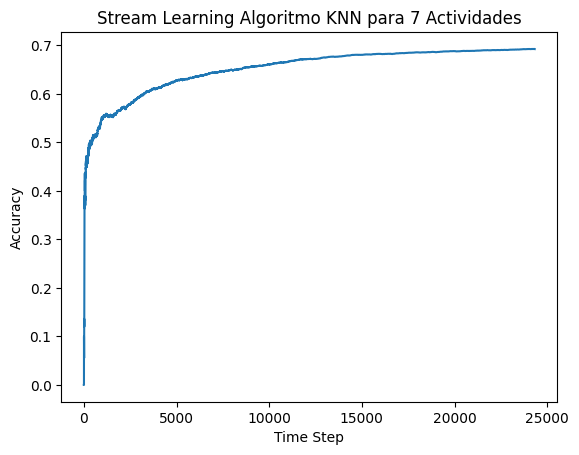

24327 samples analyzed.
Random Forest accuracy: 0.6926049245694085
Precision: 0.5779548846146453
F1-score: 0.5454492883369625


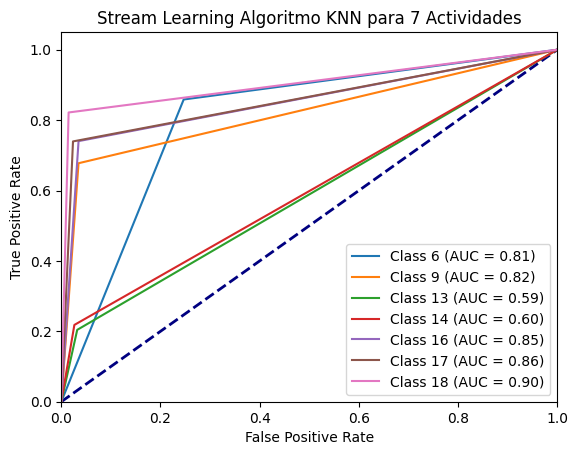

AUC for Class 0: 0.8059102629391308
AUC for Class 1: 0.8213706492644467
AUC for Class 2: 0.5860178651399005
AUC for Class 3: 0.5959016780364942
AUC for Class 4: 0.8527506432715886
AUC for Class 5: 0.8579330567644752
AUC for Class 6: 0.9034749101675252
Average AUC (macro): 0.77


In [ ]:
from skmultiflow.lazy import KNNClassifier
from skmultiflow.data import SEAGenerator
from skmultiflow.data import DataStream
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import joblib

np.random.seed(42)


df = Datasetsin16_7.sample(frac=1)

target_idx = df.columns.get_loc("Activity")

# Crear el flujo de datos
stream = DataStream(df, target_idx=target_idx)


modelo = KNNClassifier(n_neighbors=5, max_window_size=10000, leaf_size=30)


n_samples = 0
correct_cnt = 0
max_samples = 30000

y_true = []
y_pred = []


accuracy_history = []


while n_samples < max_samples and stream.has_more_samples():

    X, y = stream.next_sample()
    y_pred_batch = modelo.predict(X)

    y_true.append(y[0])
    y_pred.append(y_pred_batch[0])

    if y[0] == y_pred_batch[0]:
        correct_cnt += 1

    modelo = modelo.partial_fit(X, y)
    n_samples += 1


    accuracy = correct_cnt / n_samples
    accuracy_history.append(accuracy)

joblib.dump(modelo, '/content/drive/MyDrive/TESIS_DATASET/Datasets definitivos_CSV/Modelos/KNN_10000Filas_7_Actividades.pkl')


plt.figure()
plt.plot(range(len(accuracy_history)), accuracy_history)
plt.xlabel('Time Step')
plt.ylabel('Accuracy')
plt.title('Stream Learning Algoritmo KNN para 7 Actividades')
plt.savefig('/content/drive/MyDrive/TESIS_DATASET/Datasets definitivos_CSV/Graficas Accuracy /KNN_10000Filas_7_Actividades.png', dpi=300, bbox_inches='tight')
plt.show()

###################################

# Calcular métricas
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')


print('{} samples analyzed.'.format(n_samples))
print('Random Forest accuracy: {}'.format(correct_cnt / n_samples))
print('Precision: {}'.format(precision))
print('F1-score: {}'.format(f1))

# Calcular métricas por clase
n_classes = len(np.unique(y_true))  # Número de clases en las etiquetas verdaderas
roc_auc_scores = []

for class_label in np.unique(y_true):
    y_true_class = [1 if label == class_label else 0 for label in y_true]  # Convierte a binario
    y_pred_class = [1 if pred == class_label else 0 for pred in y_pred]  # Convierte a binario
    auc_class = roc_auc_score(y_true_class, y_pred_class)
    roc_auc_scores.append(auc_class)

plt.figure()
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

for class_label in np.unique(y_true):
    y_true_class = [1 if label == class_label else 0 for label in y_true]
    y_pred_class = [1 if pred == class_label else 0 for pred in y_pred]
    fpr, tpr, _ = roc_curve(y_true_class, y_pred_class)
    auc_class = roc_auc_score(y_true_class, y_pred_class)
    plt.plot(fpr, tpr, label=f'Class {class_label} (AUC = {auc_class:.2f})')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Stream Learning Algoritmo KNN para 7 Actividades')
plt.legend(loc="lower right")
plt.savefig('/content/drive/MyDrive/TESIS_DATASET/Datasets definitivos_CSV/ROC/KNN_10000Filas_7_Actividades.png', dpi=300, bbox_inches='tight')
plt.show()

# Imprimir AUC por clase
for class_label, auc_class in enumerate(roc_auc_scores):
    print(f'AUC for Class {class_label}: {auc_class}')

average_auc_macro = np.mean(roc_auc_scores)
print(f'Average AUC (macro): {average_auc_macro:.2f}')

#Batch

##Entrenamiento con 5 actividades

###Random Forest

Precisión del modelo: 0.98
Precisión del modelo: 0.98
AUC del modelo: 1.00
F1-score del modelo: 0.98


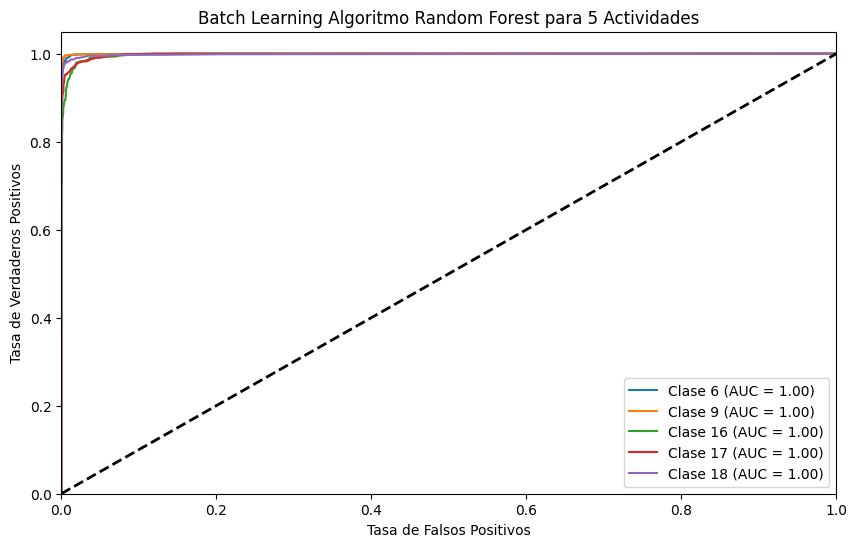

Precisión para la clase Clase 6: 0.99
Precisión para la clase Clase 9: 0.99
Precisión para la clase Clase 16: 0.95
Precisión para la clase Clase 17: 0.95
Precisión para la clase Clase 18: 0.97


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
import joblib

np.random.seed(30)

df = Datasetsin16_5.sample(frac=1)


X = df.drop(['Activity'], axis=1)
y = df['Activity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)


rf_classifier.fit(X_train, y_train)

joblib.dump(rf_classifier, '/content/drive/MyDrive/TESIS_DATASET/Datasets definitivos_CSV/Modelos_Batch/randomforest_5_actividades.pkl')


y_pred = rf_classifier.predict(X_test)

# Calcular la exactitud del modelo en el conjunto de prueba
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy:.2f}')

# Calcular la precisión del modelo
precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precisión del modelo: {precision:.2f}')

########################3 Calcular el AUC (Área bajo la curva ROC)#############################################################3
y_prob = rf_classifier.predict_proba(X_test)

# Calcular el AUC
auc_score = roc_auc_score(y_test, y_prob, average='weighted', multi_class='ovr')
print(f'AUC del modelo: {auc_score:.2f}')

#############################33# Calcular la puntuación F1######################################################################33
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1-score del modelo: {f1:.2f}')

#Calcular ROC

# Obtener las tasas de verdaderos positivos (True Positive Rates) y tasas de falsos positivos (False Positive Rates) para Decision Tree
fpr = dict()
tpr = dict()
roc_auc = dict()

# Trazar la curva ROC para Decision Tree

unique_classes = sorted(df['Activity'].unique())

# Crear un diccionario que asocie los valores únicos con nombres de clase
class_names = {class_val: f'Clase {class_val}' for class_val in unique_classes}

# Calcular para cada clase
for class_val in unique_classes:
    class_name = class_names[class_val]  # Obtener el nombre de la clase
    i = np.where(np.unique(y_test) == class_val)[0][0]  # Índice de la clase en las predicciones
    fpr[i], tpr[i], _ = roc_curve(y_test, y_prob[:, i], pos_label=class_val)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Después de calcular las curvas ROC para cada clase
plt.figure(figsize=(10, 6))

# Trazar las curvas ROC para cada clase
for i in range(len(np.unique(y_test))):
    class_name = class_names[unique_classes[i]]  # Obtener el nombre de la clase
    plt.plot(fpr[i], tpr[i], label=f'{class_name} (AUC = {roc_auc[i]:.2f})')

# Configurar el gráfico
plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Batch Learning Algoritmo Random Forest para 5 Actividades')
plt.legend(loc='best')
plt.savefig('/content/drive/MyDrive/TESIS_DATASET/Datasets definitivos_CSV/ROC/Ramdom_forest_batch_5_actividades.png', dpi=300, bbox_inches='tight')
plt.show()

class_accuracy = {}

for class_val in unique_classes:
    mask = y_test == class_val
    accuracy = accuracy_score(y_test[mask], y_pred[mask])
    class_accuracy[class_val] = accuracy

# Imprimir la precisión de cada clase
for class_val, accuracy in class_accuracy.items():
    class_name = class_names[class_val]
    print(f'Precisión para la clase {class_name}: {accuracy:.2f}')

###Decission Tree

Precisión del modelo: 0.95
Precisión del modelo: 0.95
AUC del modelo: 0.97
F1-score del modelo: 0.95


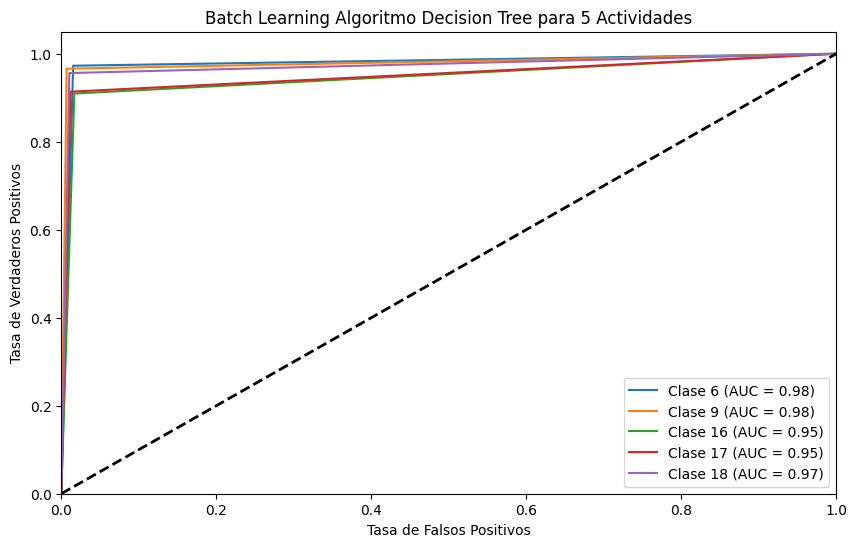

Precisión para la clase Clase 6: 0.97
Precisión para la clase Clase 9: 0.97
Precisión para la clase Clase 16: 0.91
Precisión para la clase Clase 17: 0.91
Precisión para la clase Clase 18: 0.96


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

np.random.seed(30)


df = Datasetsin16_5.sample(frac=1)

rómetro y giroscopio
y = df['Activity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

modelo = DecisionTreeClassifier(random_state=42)


modelo.fit(X_train, y_train)

joblib.dump(modelo, '/content/drive/MyDrive/TESIS_DATASET/Datasets definitivos_CSV/Modelos_Batch/decissiontree_5_actividades.pkl')


y_pred = modelo.predict(X_test)

# Calcular la exactitud del modelo en el conjunto de prueba
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy:.2f}')

# Calcular la precisión del modelo
precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precisión del modelo: {precision:.2f}')

########################3 Calcular el AUC (Área bajo la curva ROC)#############################################################3
y_prob = modelo.predict_proba(X_test)

# Calcular el AUC
auc_score = roc_auc_score(y_test, y_prob, average='weighted', multi_class='ovr')
print(f'AUC del modelo: {auc_score:.2f}')

#############################33# Calcular la puntuación F1######################################################################33
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1-score del modelo: {f1:.2f}')

#Calcular ROC

# Obtener las tasas de verdaderos positivos (True Positive Rates) y tasas de falsos positivos (False Positive Rates)
fpr = dict()
tpr = dict()
roc_auc = dict()

# Trazar la curva ROC

unique_classes = sorted(df['Activity'].unique())

# Crear un diccionario que asocie los valores únicos con nombres de clase
class_names = {class_val: f'Clase {class_val}' for class_val in unique_classes}

# Calcular para cada clase
for class_val in unique_classes:
    class_name = class_names[class_val]  # Obtener el nombre de la clase
    i = np.where(np.unique(y_test) == class_val)[0][0]  # Índice de la clase en las predicciones
    fpr[i], tpr[i], _ = roc_curve(y_test, y_prob[:, i], pos_label=class_val)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Después de calcular las curvas ROC para cada clase
plt.figure(figsize=(10, 6))

# Trazar las curvas ROC para cada clase
for i in range(len(np.unique(y_test))):
    class_name = class_names[unique_classes[i]]  # Obtener el nombre de la clase
    plt.plot(fpr[i], tpr[i], label=f'{class_name} (AUC = {roc_auc[i]:.2f})')

# Configurar el gráfico
plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Batch Learning Algoritmo Decision Tree para 5 Actividades')
plt.legend(loc='best')
plt.savefig('/content/drive/MyDrive/TESIS_DATASET/Datasets definitivos_CSV/ROC/Decission_Tree_batch_5_actividades.png', dpi=300, bbox_inches='tight')
plt.show()

class_accuracy = {}

for class_val in unique_classes:
    mask = y_test == class_val
    accuracy = accuracy_score(y_test[mask], y_pred[mask])
    class_accuracy[class_val] = accuracy

# Imprimir la precisión de cada clase
for class_val, accuracy in class_accuracy.items():
    class_name = class_names[class_val]
    print(f'Precisión para la clase {class_name}: {accuracy:.2f}')

##Entrenamiento con 7 actividades

###Random

Precisión del modelo: 0.95
Precisión del modelo: 0.95
AUC del modelo: 1.00
F1-score del modelo: 0.95


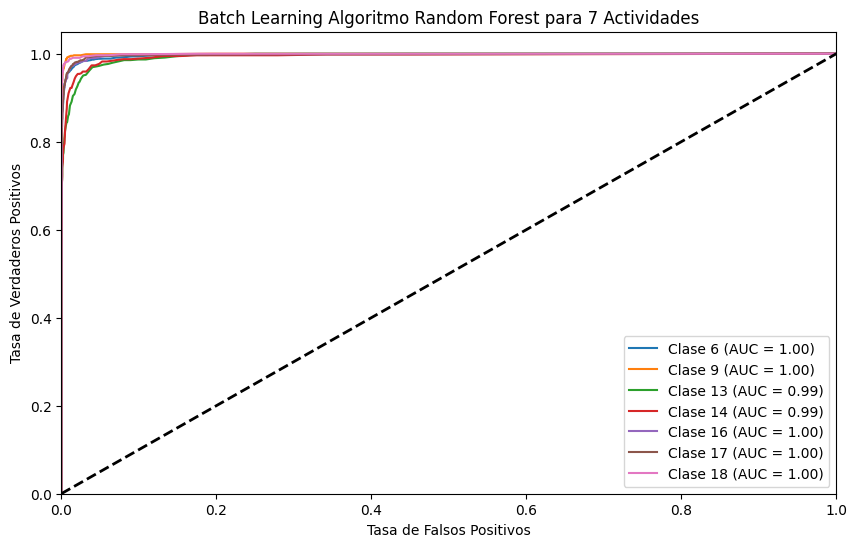

Precisión para la clase Clase 6: 0.99
Precisión para la clase Clase 9: 0.98
Precisión para la clase Clase 13: 0.81
Precisión para la clase Clase 14: 0.83
Precisión para la clase Clase 16: 0.94
Precisión para la clase Clase 17: 0.95
Precisión para la clase Clase 18: 0.97


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
import joblib

np.random.seed(42)


df = Datasetsin16_7.sample(frac=1)


X = df.drop(['Activity'], axis=1)
y = df['Activity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)

joblib.dump(rf_classifier, '/content/drive/MyDrive/TESIS_DATASET/Datasets definitivos_CSV/Modelos_Batch/randomforest_7_actividades.pkl')


y_pred = rf_classifier.predict(X_test)

# Calcular la exactitud del modelo en el conjunto de prueba
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy:.2f}')

# Calcular la precisión del modelo
precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precisión del modelo: {precision:.2f}')

########################3 Calcular el AUC (Área bajo la curva ROC)#############################################################3
y_prob = rf_classifier.predict_proba(X_test)

# Calcular el AUC
auc_score = roc_auc_score(y_test, y_prob, average='weighted', multi_class='ovr')
print(f'AUC del modelo: {auc_score:.2f}')

#############################33# Calcular la puntuación F1######################################################################33
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1-score del modelo: {f1:.2f}')

#Calcular ROC

# Obtener las tasas de verdaderos positivos (True Positive Rates) y tasas de falsos positivos (False Positive Rates) para Decision Tree
fpr = dict()
tpr = dict()
roc_auc = dict()

# Trazar la curva ROC para Decision Tree

unique_classes = sorted(df['Activity'].unique())

# Crear un diccionario que asocie los valores únicos con nombres de clase
class_names = {class_val: f'Clase {class_val}' for class_val in unique_classes}

# Calcular para cada clase
for class_val in unique_classes:
    class_name = class_names[class_val]  # Obtener el nombre de la clase
    i = np.where(np.unique(y_test) == class_val)[0][0]  # Índice de la clase en las predicciones
    fpr[i], tpr[i], _ = roc_curve(y_test, y_prob[:, i], pos_label=class_val)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Después de calcular las curvas ROC para cada clase
plt.figure(figsize=(10, 6))

# Trazar las curvas ROC para cada clase
for i in range(len(np.unique(y_test))):
    class_name = class_names[unique_classes[i]]  # Obtener el nombre de la clase
    plt.plot(fpr[i], tpr[i], label=f'{class_name} (AUC = {roc_auc[i]:.2f})')

# Configurar el gráfico
plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Batch Learning Algoritmo Random Forest para 7 Actividades')
plt.legend(loc='best')
plt.savefig('/content/drive/MyDrive/TESIS_DATASET/Datasets definitivos_CSV/ROC/Ramdom_forest_batch_7_actividades.png', dpi=300, bbox_inches='tight')
plt.show()

class_accuracy = {}

for class_val in unique_classes:
    mask = y_test == class_val
    accuracy = accuracy_score(y_test[mask], y_pred[mask])
    class_accuracy[class_val] = accuracy

# Imprimir la precisión de cada clase
for class_val, accuracy in class_accuracy.items():
    class_name = class_names[class_val]
    print(f'Precisión para la clase {class_name}: {accuracy:.2f}')

###Decission Tree

Precisión del modelo: 0.89
Precisión del modelo: 0.89
AUC del modelo: 0.93
F1-score del modelo: 0.89


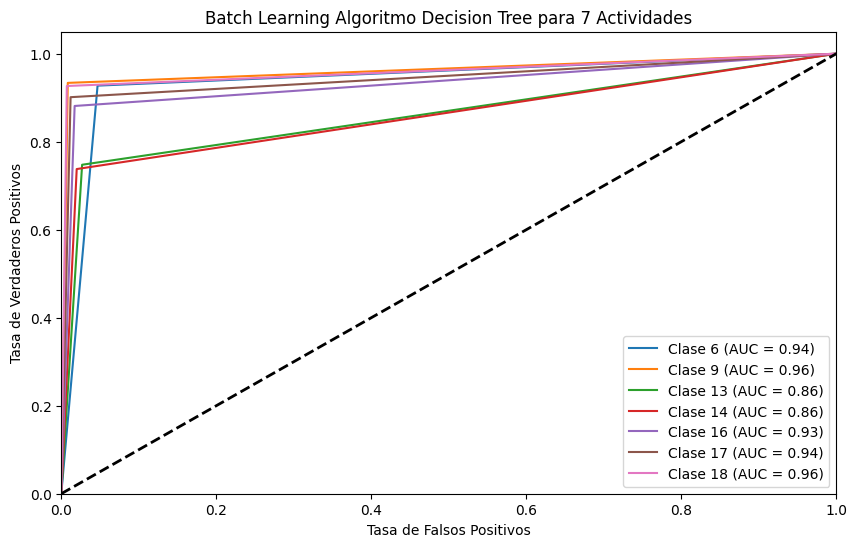

Precisión para la clase Clase 6: 0.93
Precisión para la clase Clase 9: 0.93
Precisión para la clase Clase 13: 0.75
Precisión para la clase Clase 14: 0.74
Precisión para la clase Clase 16: 0.88
Precisión para la clase Clase 17: 0.90
Precisión para la clase Clase 18: 0.93


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

np.random.seed(30)


df = Datasetsin16_7.sample(frac=1)


X = df.drop(['Activity'], axis=1)
y = df['Activity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

modelo = DecisionTreeClassifier(random_state=42)


modelo.fit(X_train, y_train)

joblib.dump(modelo, '/content/drive/MyDrive/TESIS_DATASET/Datasets definitivos_CSV/Modelos_Batch/decissiontree_7_actividades.pkl')


y_pred = modelo.predict(X_test)

# Calcular la exactitud del modelo en el conjunto de prueba
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy:.2f}')

# Calcular la precisión del modelo
precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precisión del modelo: {precision:.2f}')

########################3 Calcular el AUC (Área bajo la curva ROC)#############################################################3
y_prob = modelo.predict_proba(X_test)

# Calcular el AUC
auc_score = roc_auc_score(y_test, y_prob, average='weighted', multi_class='ovr')
print(f'AUC del modelo: {auc_score:.2f}')

#############################33# Calcular la puntuación F1######################################################################33
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1-score del modelo: {f1:.2f}')

#Calcular ROC

# Obtener las tasas de verdaderos positivos (True Positive Rates) y tasas de falsos positivos (False Positive Rates)
fpr = dict()
tpr = dict()
roc_auc = dict()


unique_classes = sorted(df['Activity'].unique())

# Crear un diccionario que asocie los valores únicos con nombres de clase
class_names = {class_val: f'Clase {class_val}' for class_val in unique_classes}

# Calcular para cada clase
for class_val in unique_classes:
    class_name = class_names[class_val]  # Obtener el nombre de la clase
    i = np.where(np.unique(y_test) == class_val)[0][0]  # Índice de la clase en las predicciones
    fpr[i], tpr[i], _ = roc_curve(y_test, y_prob[:, i], pos_label=class_val)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Después de calcular las curvas ROC para cada clase
plt.figure(figsize=(10, 6))

# Trazar las curvas ROC para cada clase
for i in range(len(np.unique(y_test))):
    class_name = class_names[unique_classes[i]]  # Obtener el nombre de la clase
    plt.plot(fpr[i], tpr[i], label=f'{class_name} (AUC = {roc_auc[i]:.2f})')

# Configurar el gráfico
plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Batch Learning Algoritmo Decision Tree para 7 Actividades')
plt.legend(loc='best')
plt.savefig('/content/drive/MyDrive/TESIS_DATASET/Datasets definitivos_CSV/ROC/Decission_Tree_batch_7_actividades.png', dpi=300, bbox_inches='tight')
plt.show()

class_accuracy = {}

for class_val in unique_classes:
    mask = y_test == class_val
    accuracy = accuracy_score(y_test[mask], y_pred[mask])
    class_accuracy[class_val] = accuracy

# Imprimir la precisión de cada clase
for class_val, accuracy in class_accuracy.items():
    class_name = class_names[class_val]
    print(f'Precisión para la clase {class_name}: {accuracy:.2f}')

##Con todas las actividades, validación cruzada

###Random Forest

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

np.random.seed(30)


df = Datasetsin16.sample(frac=1)

X = df.drop(['Activity'], axis=1)
y = df['Activity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Realizar validación cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = {'accuracy': 'accuracy', 'precision': 'precision_weighted', 'roc_auc': 'roc_auc_ovo_weighted', 'f1': 'f1_weighted'}

cv_results = cross_validate(rf_classifier, X_train, y_train, cv=cv, scoring=scoring)

# Resultados promediados de las métricas
print(f'Accuracy promedio: {np.mean(cv_results["test_accuracy"]):.2f}')
print(f'Precision promedio: {np.mean(cv_results["test_precision"]):.2f}')
print(f'AUC promedio: {np.mean(cv_results["test_roc_auc"]):.2f}')
print(f'F1-score promedio: {np.mean(cv_results["test_f1"]):.2f}')

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

# Métricas generales
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, rf_classifier.predict_proba(X_test), average='weighted', multi_class='ovr')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Precisión en el conjunto de prueba: {accuracy:.2f}')
print(f'Precision promedio en el conjunto de prueba: {precision:.2f}')
print(f'AUC en el conjunto de prueba: {roc_auc:.2f}')
print(f'F1-score en el conjunto de prueba: {f1:.2f}')


Accuracy promedio: 0.97
Precision promedio: 0.97
AUC promedio: 1.00
F1-score promedio: 0.97
Precisión en el conjunto de prueba: 0.98
Precision promedio en el conjunto de prueba: 0.98
AUC en el conjunto de prueba: 1.00
F1-score en el conjunto de prueba: 0.98


###Decission Tree

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

np.random.seed(30)


df = Datasetsin16.sample(frac=1)

X = df.drop(['Activity'], axis=1)
y = df['Activity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

modelo = DecisionTreeClassifier(random_state=42)

# Realizar validación cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = {'accuracy': 'accuracy', 'precision': 'precision_weighted', 'roc_auc': 'roc_auc_ovo_weighted', 'f1': 'f1_weighted'}

cv_results = cross_validate(modelo, X_train, y_train, cv=cv, scoring=scoring)

# Resultados promediados de las métricas
print(f'Accuracy promedio: {np.mean(cv_results["test_accuracy"]):.2f}')
print(f'Precision promedio: {np.mean(cv_results["test_precision"]):.2f}')
print(f'AUC promedio: {np.mean(cv_results["test_roc_auc"]):.2f}')
print(f'F1-score promedio: {np.mean(cv_results["test_f1"]):.2f}')

modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

# Métricas generales
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, modelo.predict_proba(X_test), average='weighted', multi_class='ovr')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Precisión en el conjunto de prueba: {accuracy:.2f}')
print(f'Precision promedio en el conjunto de prueba: {precision:.2f}')
print(f'AUC en el conjunto de prueba: {roc_auc:.2f}')
print(f'F1-score en el conjunto de prueba: {f1:.2f}')

Accuracy promedio: 0.95
Precision promedio: 0.95
AUC promedio: 0.96
F1-score promedio: 0.95
Precisión en el conjunto de prueba: 0.95
Precision promedio en el conjunto de prueba: 0.95
AUC en el conjunto de prueba: 0.97
F1-score en el conjunto de prueba: 0.95


#Con todo el dataset, incluye el dataset 16, y las 5 actividades

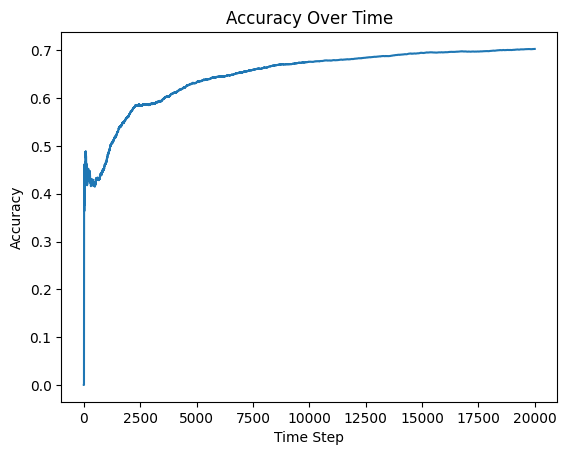

20000 samples analyzed.
Random Forest accuracy: 0.703
Precision: 0.643872346592211
F1-score: 0.4633330350534632


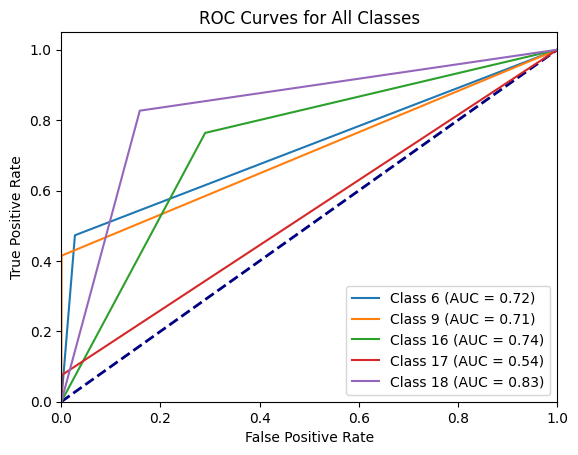

AUC for Class 0: 0.7226741700639877
AUC for Class 1: 0.7071165497758942
AUC for Class 2: 0.7367598805297468
AUC for Class 3: 0.5373276394997002
AUC for Class 4: 0.8342587103295255
Average AUC (macro): 0.71


In [ ]:
from skmultiflow.meta import AdaptiveRandomForestClassifier
from skmultiflow.data import SEAGenerator
from skmultiflow.data import DataStream
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import joblib


np.random.seed(42)


df = Dataset.sample(frac=1)

target_idx = df.columns.get_loc("Activity")

# Crear el flujo de datos
stream = DataStream(df, target_idx=target_idx)


modelo = AdaptiveRandomForestClassifier()


n_samples = 0
correct_cnt = 0
max_samples = 20000

y_true = []
y_pred = []


accuracy_history = []


while n_samples < max_samples and stream.has_more_samples():

    X, y = stream.next_sample()
    y_pred_batch = modelo.predict(X)

    y_true.append(y[0])
    y_pred.append(y_pred_batch[0])

    if y[0] == y_pred_batch[0]:
        correct_cnt += 1

    modelo = modelo.partial_fit(X, y)
    n_samples += 1


    accuracy = correct_cnt / n_samples
    accuracy_history.append(accuracy)

joblib.dump(modelo, '/content/drive/MyDrive/TESIS_DATASET/Datasets definitivos_CSV/Modelos/Random_Forest_5_Actividades_con_el_16.pkl')


plt.figure()
plt.plot(range(len(accuracy_history)), accuracy_history)
plt.xlabel('Time Step')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Time')
plt.savefig('/content/drive/MyDrive/TESIS_DATASET/Datasets definitivos_CSV/Graficas Accuracy /Random_Forest_5_Actividades_con_el_16.png', dpi=300, bbox_inches='tight')
plt.show()

###################################

# Calcular métricas
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')


print('{} samples analyzed.'.format(n_samples))
print('Random Forest accuracy: {}'.format(correct_cnt / n_samples))
print('Precision: {}'.format(precision))
print('F1-score: {}'.format(f1))

# Calcular métricas por clase
n_classes = len(np.unique(y_true))  # Número de clases en las etiquetas verdaderas
roc_auc_scores = []

for class_label in np.unique(y_true):
    y_true_class = [1 if label == class_label else 0 for label in y_true]  # Convierte a binario
    y_pred_class = [1 if pred == class_label else 0 for pred in y_pred]  # Convierte a binario
    auc_class = roc_auc_score(y_true_class, y_pred_class)
    roc_auc_scores.append(auc_class)

plt.figure()
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

for class_label in np.unique(y_true):
    y_true_class = [1 if label == class_label else 0 for label in y_true]
    y_pred_class = [1 if pred == class_label else 0 for pred in y_pred]
    fpr, tpr, _ = roc_curve(y_true_class, y_pred_class)
    auc_class = roc_auc_score(y_true_class, y_pred_class)
    plt.plot(fpr, tpr, label=f'Class {class_label} (AUC = {auc_class:.2f})')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Classes')
plt.legend(loc="lower right")
plt.savefig('/content/drive/MyDrive/TESIS_DATASET/Datasets definitivos_CSV/ROC/Random_Forest_5_Actividades_con_el_16.png', dpi=300, bbox_inches='tight')
plt.show()

# Imprimir AUC por clase
for class_label, auc_class in enumerate(roc_auc_scores):
    print(f'AUC for Class {class_label}: {auc_class}')

average_auc_macro = np.mean(roc_auc_scores)
print(f'Average AUC (macro): {average_auc_macro:.2f}')